# Final Project

## Loading data

In [1]:
from sklearn.exceptions import DataConversionWarning
import warnings
from pandas.core.common import SettingWithCopyWarning
from dash.dependencies import Input, Output
from dash import html
from dash import dcc
import dash
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import statistics
import plotly.io as pio
pio.renderers.default = 'notebook'
pio.templates.default = "plotly_dark"
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
data1 = pd.read_excel("globalterrorismdb_0221dist.xlsx")
data2 = pd.read_excel("gtd1993_0221dist.xlsx")
# data1 is the main archives while data2 is the missing 1993 records that were recovered later.
# These two files are loaded into dataframes and concatenated.
raw_data = pd.concat([data1, data2], axis=0, ignore_index=True)
raw_data = raw_data.sort_values('eventid')
# The rows are sorted into proper chronological order
raw_data = raw_data.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day',
                           'country': 'Country Code', 'country_txt': 'Country', 'region': 'Region Code'})
# The columns are given more intuitive names


## Exploratory Data Analysis

This section will be exploratory data analysis in order to find more patterns, gather more info about the data and find any hidden insights.

In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201931 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 209.5+ MB


### How many attacks in the dataset?

In [3]:
print(f"There are {raw_data.shape[0]} attacks in the data.")

There are 201931 attacks in the data.


Graphics and visuals are better at conveying meaning. The next section of my project is made up of various descriptive statistics and answering various research questions. Some graphs and charts will be static as they won't have variables that can really be changed while some graphs and charts are interactive. 

### How many attacks by year?

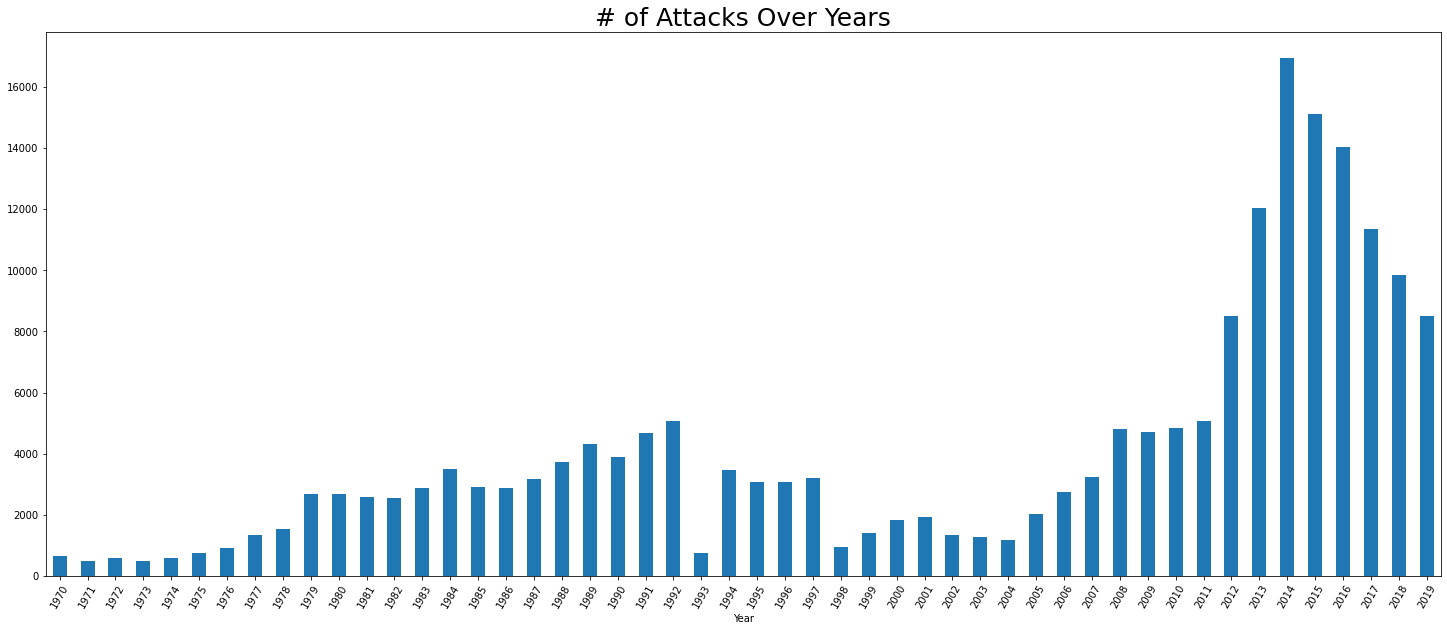

In [4]:
raw_data.groupby('Year')\
        .size()\
        .plot(kind='bar', figsize=(25, 10), rot=60)
plt.title('# of Attacks Over Years', size=25)
plt.show()


### How many attacks sorted by region and which region has suffered the most attacks?

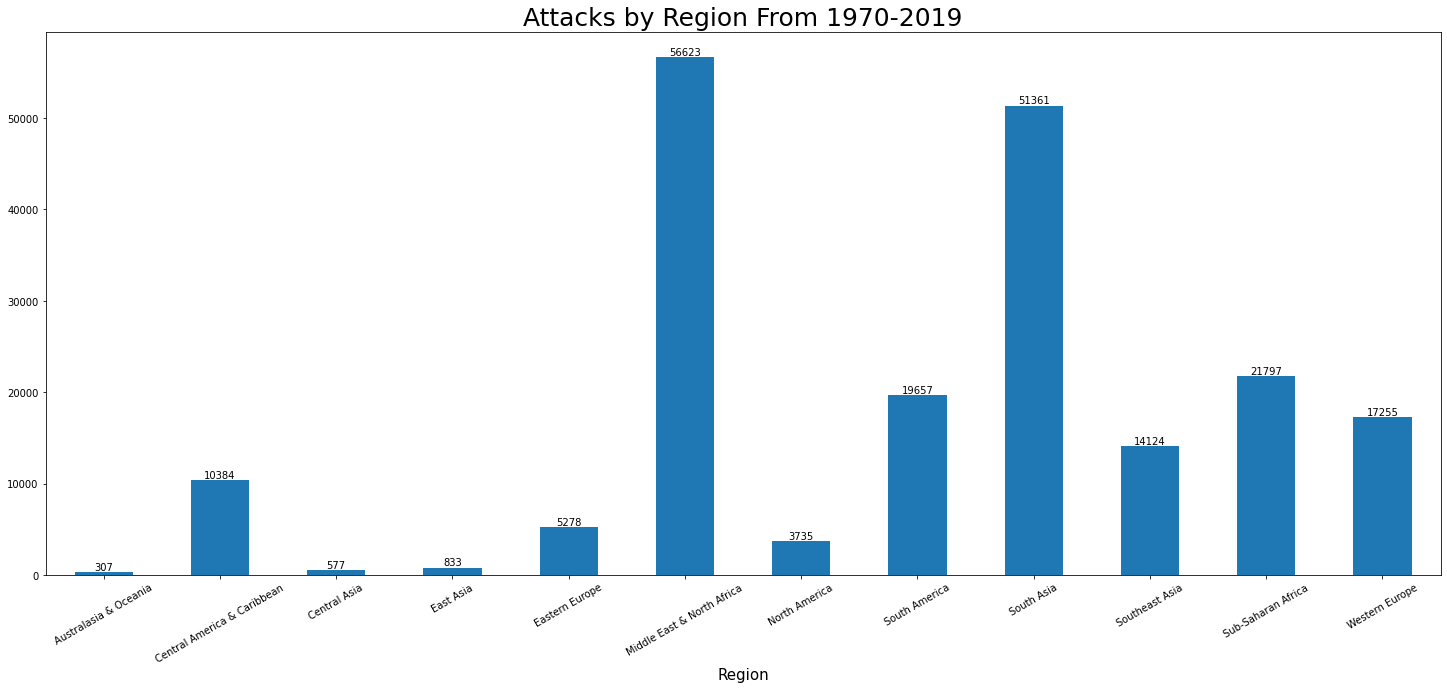

In [5]:
attacks_by_region = raw_data.groupby('region_txt')\
                            .size()\
                            .plot(kind='bar', figsize=(25, 10), rot=30)
plt.bar_label(attacks_by_region.containers[0])
plt.title('Attacks by Region From 1970-2019', size=25)
plt.xlabel('Region', fontsize=15)
plt.show()


### Which country has suffered the most attacks?

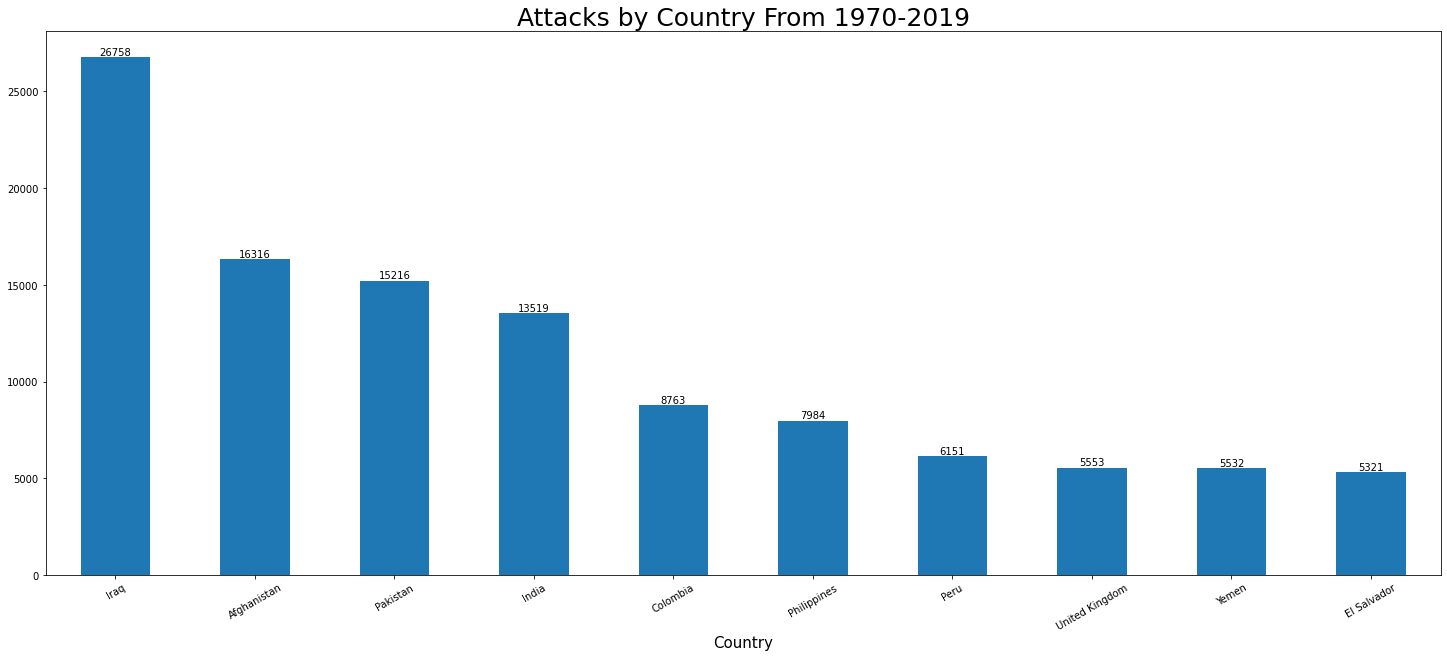

In [6]:
attacks_by_country = raw_data.groupby('Country')\
                             .size()\
                             .sort_values(ascending=False)[0:10]\
                             .plot(kind='bar', figsize=(25, 10), rot=30)
plt.title('Attacks by Country From 1970-2019', fontsize=25)
plt.xlabel('Country', fontsize=15)
plt.bar_label(attacks_by_country.containers[0])
plt.show()


### Attacks grouped by specific terrorist groups

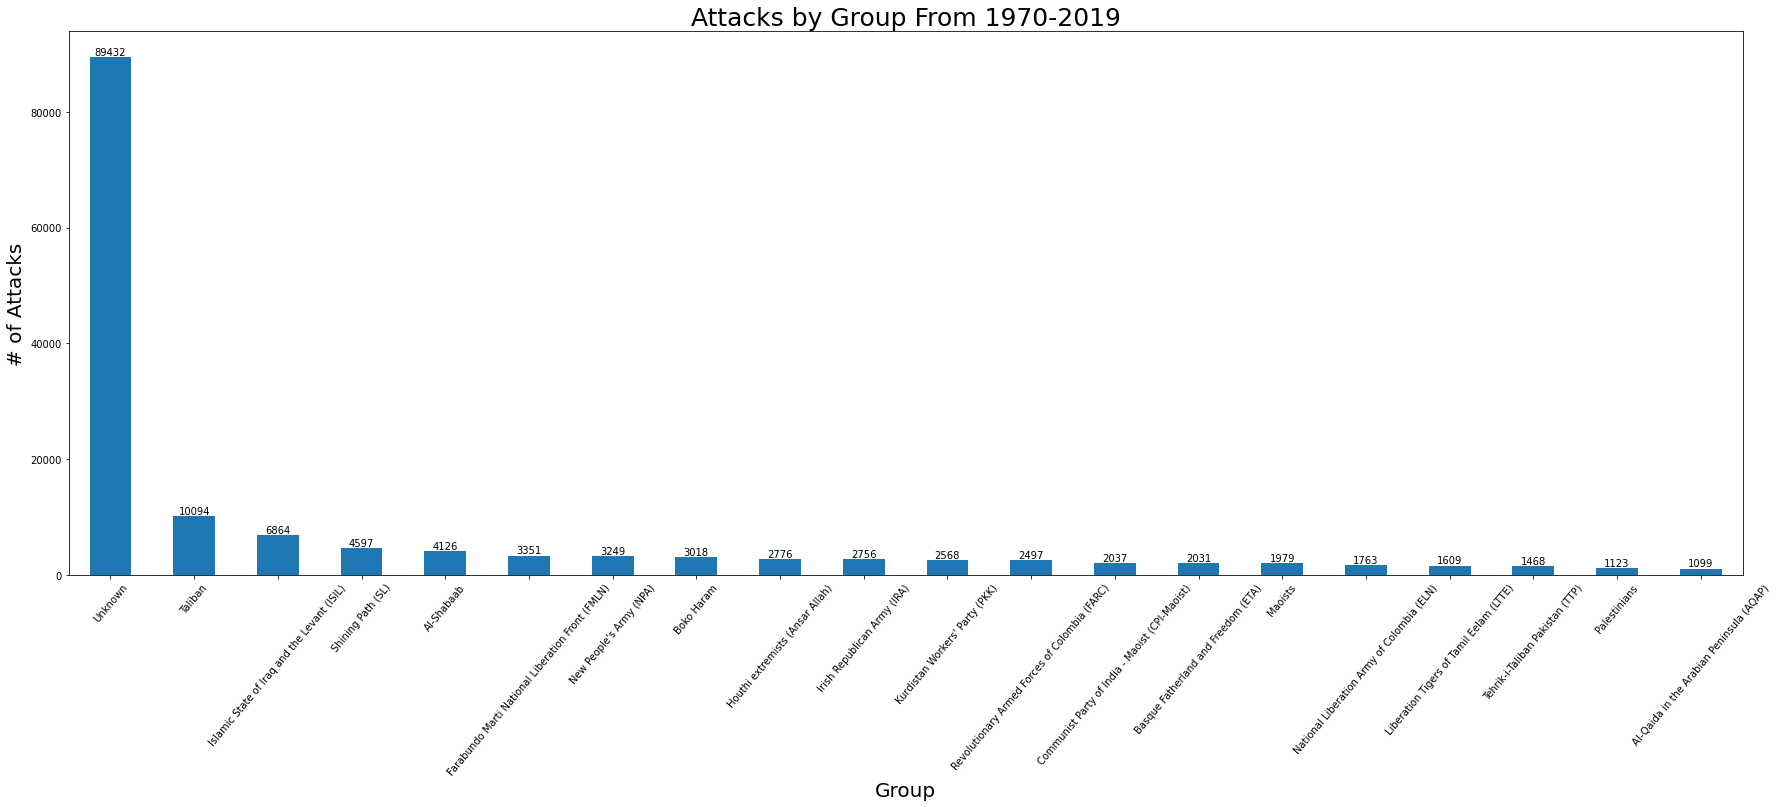

In [7]:
attacks_by_group = raw_data.groupby('gname')\
                           .size()\
                           .sort_values(ascending=False)[0:20]\
                           .plot(kind='bar', rot=50, figsize=(30, 10))
plt.title('Attacks by Group From 1970-2019', fontsize=25)
plt.ylabel("# of Attacks", fontsize=20)
plt.xlabel("Group", fontsize=20)
plt.bar_label(attacks_by_group.containers[0])
plt.show()


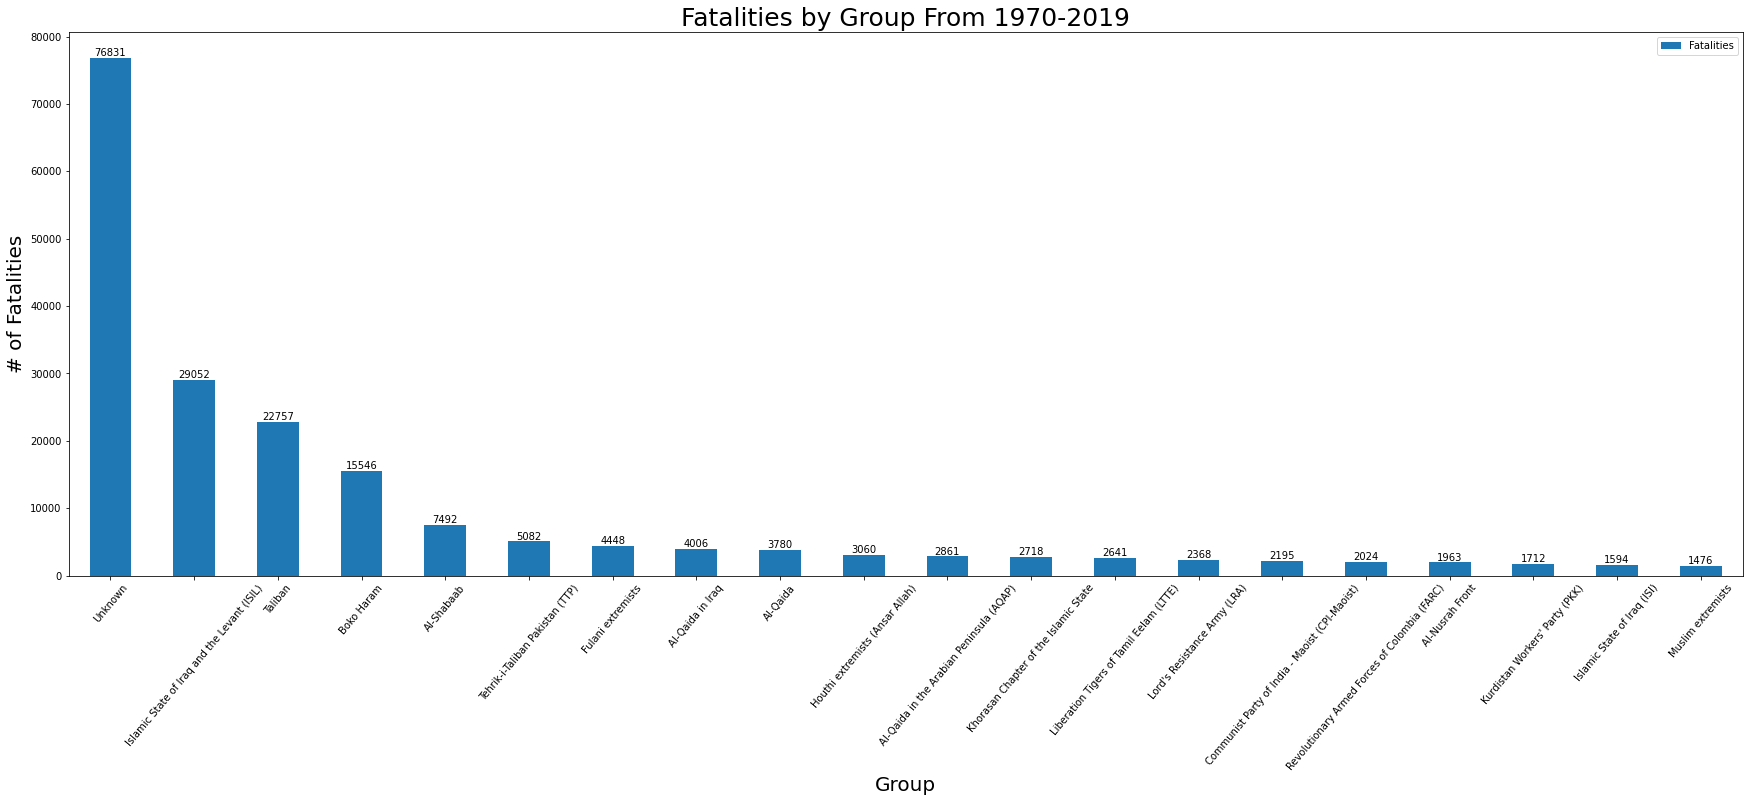

In [8]:
fatalities_by_groups = raw_data[['gname', 'nkill', 'nkillter']]
fatalities_by_groups = fatalities_by_groups.dropna(axis=0, subset=['nkill'])
fatalities_by_groups = fatalities_by_groups.dropna(axis=0, subset=['nkillter'])
fatalities_by_groups['Fatalities'] = fatalities_by_groups['nkill'] - fatalities_by_groups['nkillter']
fatalities_by_groups = fatalities_by_groups.drop(columns=["nkill", 'nkillter'])
graph = fatalities_by_groups.groupby("gname")\
                            .sum().sort_values(by=['Fatalities'], ascending=False)[0:20]\
                            .plot(kind='bar', rot=50, figsize=(30, 10))
plt.title('Fatalities by Group From 1970-2019', fontsize=25)
plt.ylabel("# of Fatalities", fontsize=20)
plt.xlabel("Group", fontsize=20)
plt.bar_label(graph.containers[0])
plt.show()


### Correlation between weapons and outcome

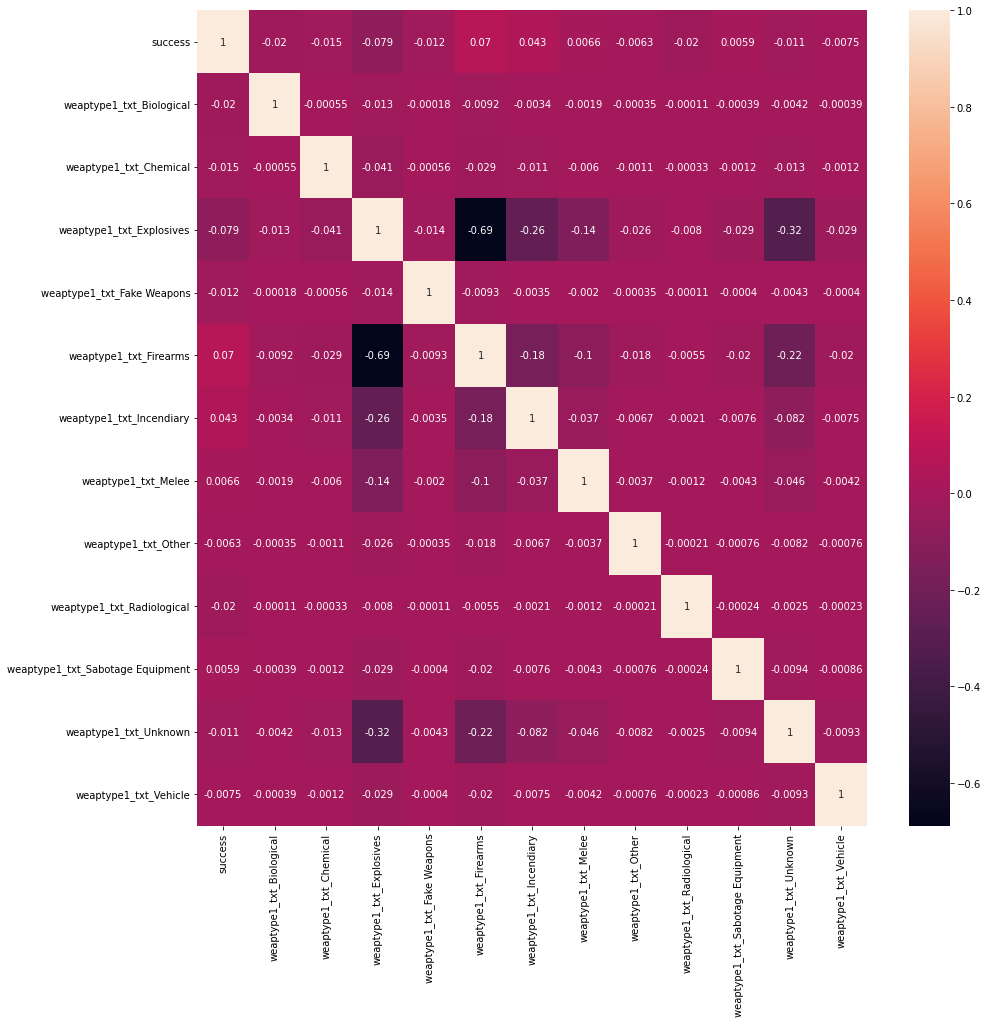

In [9]:
weapon_outcome = pd.get_dummies(raw_data[['weaptype1_txt', 'success']])
weapon_outcome = weapon_outcome.rename(columns={'weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)': 'weaptype1_txt_Vehicle'})
plt.figure(figsize=(15, 15))
sns.heatmap(weapon_outcome.corr(), annot=True)
plt.show()


It seems that the weapon with most correlation to success is firearms. This makes sense as a firearm can be reloaded and is not single use weapon like a bomb. I will investigate further into the weapon subtype.

In [10]:
weaponsub_outcome = pd.get_dummies(raw_data[['weapsubtype1_txt', 'success']])
weaponsub_outcome.columns

Index(['success', 'weapsubtype1_txt_Arson/Fire',
       'weapsubtype1_txt_Automatic or Semi-Automatic Rifle',
       'weapsubtype1_txt_Blunt Object', 'weapsubtype1_txt_Dynamite/TNT',
       'weapsubtype1_txt_Explosive', 'weapsubtype1_txt_Gasoline or Alcohol',
       'weapsubtype1_txt_Grenade', 'weapsubtype1_txt_Handgun',
       'weapsubtype1_txt_Hands, Feet, Fists',
       'weapsubtype1_txt_Knife or Other Sharp Object',
       'weapsubtype1_txt_Landmine', 'weapsubtype1_txt_Letter Bomb',
       'weapsubtype1_txt_Molotov Cocktail/Petrol Bomb',
       'weapsubtype1_txt_Other Explosive Type',
       'weapsubtype1_txt_Other Gun Type', 'weapsubtype1_txt_Pipe Bomb',
       'weapsubtype1_txt_Poisoning', 'weapsubtype1_txt_Pressure Trigger',
       'weapsubtype1_txt_Projectile (rockets, mortars, RPGs, etc.)',
       'weapsubtype1_txt_Remote Trigger',
       'weapsubtype1_txt_Rifle/Shotgun (non-automatic)',
       'weapsubtype1_txt_Rope or Other Strangling Device',
       'weapsubtype1_txt_Sticky

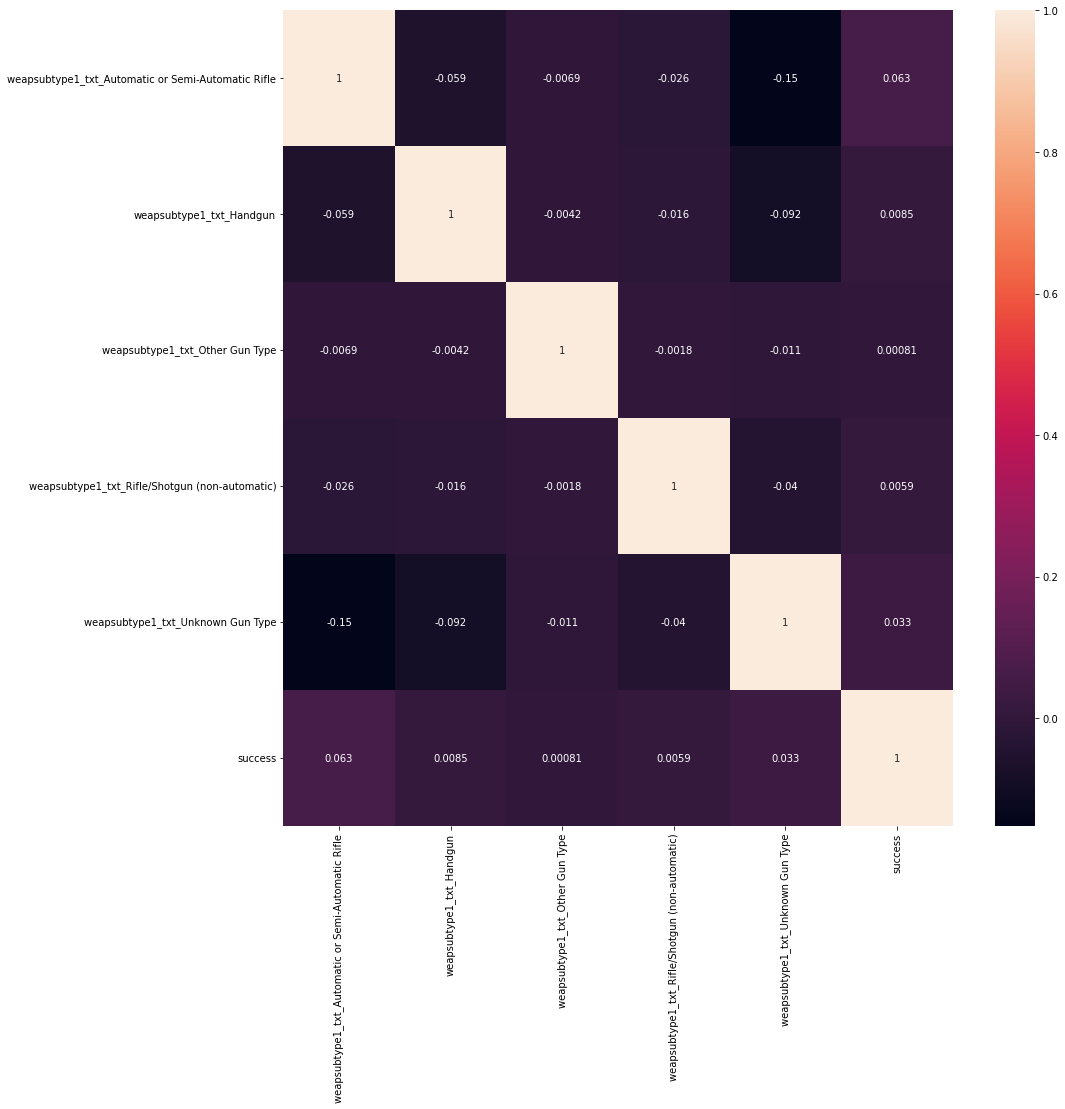

In [11]:
weaponsub_outcome = pd.get_dummies(raw_data[['weapsubtype1_txt', 'success']])
weaponsub_outcome = weaponsub_outcome[['weapsubtype1_txt_Automatic or Semi-Automatic Rifle', 'weapsubtype1_txt_Handgun',
                                       'weapsubtype1_txt_Other Gun Type', 'weapsubtype1_txt_Rifle/Shotgun (non-automatic)',
                                       'weapsubtype1_txt_Unknown Gun Type', 'success']]
plt.figure(figsize=(15, 15))
sns.heatmap(weaponsub_outcome.corr(), annot=True)
plt.show()

The biggest correlation with success is a assault rifle. This makes a lot of sense considering AK47s are all around the world, can be cheaply made and are considered a terrorist's go to weapon. 

## Data filtering and cleaning in preparation for ML models

Now that the data has been loaded, I prepare it for PCA by dropping null values as well as extraneous categorical values. On top of this, I will only use data from 2017-2019 as I only want to work with ML models of active terrorist groups. For necessary categorical values, one hot encoding will be used.

In [33]:
active_data = raw_data[raw_data["Year"]>=2017]
# filtered for only 2017-2019 data
active_data.columns[active_data.isnull().any()]
# Finding nulls

Index(['approxdate', 'resolution', 'latitude', 'longitude', 'location',
       'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt',
       'attacktype3', 'attacktype3_txt', 'targsubtype1', 'targsubtype1_txt',
       'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt',
       'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt',
       'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt',
       'weapsubtype4', 'weapsubty

In [34]:
# location is important, but I will be dropping categorical columns for location such as country_txt and provstate
# According to the data, there are 137 entries without long/lat
# I am choosing to drop these events as location is important and I want to keep it in the dataset as I'm planning to use dropna
active_data = active_data.dropna(axis=0, subset=['latitude', 'longitude'])
active_data = active_data.dropna(axis=1)
active_data = active_data.drop(columns=['Country', 'region_txt', 'provstate', 'city',  'attacktype1_txt', 'targtype1_txt', 
                                      'summary', 'eventid', 'corp1', 'target1', 'weaptype1_txt', 'scite1', 'dbsource'])
# gname is the only one left that is a string but is the crux of this dataset as this is the variable for the terror group name
# I shall now drop it from the dataset and run PCA
groups = active_data[["gname"]]
active_data = active_data.drop(columns = ['gname'])
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
active_data_std = pd.DataFrame(scale.fit_transform(active_data))
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
active_data_reduced = pca.fit_transform(active_data_std)
num_components = pca.n_components_
# The PCA has been executed and now I build the dataset with only the extremely important features
most_important_index = []
for i in range(num_components):
    most_important_index.append(np.abs(pca.components_[i]).argmax())
most_important_index.sort()
arr = np.array(most_important_index)
most_important_index = np.unique(arr)
# The unique is utilzed due to some duplicates for the principal components

Most_important_features = []
for i in most_important_index:
    Most_important_features.append(active_data.columns[i])
print("\nMost important features")
active_data[Most_important_features]


Most important features


,Year,Month,Day,extended,Region Code,latitude,crit1,crit2,doubtterr,multiple,success,targtype1,individual,nperpcap,claimed,weaptype1,property,ishostkid,INT_IDEO
171003,2017,1,2,1,6,31.318496,1,1,0,0,1.0,1,0,0.0,0.0,5,0,1.0,0
171361,2017,1,3,0,11,12.921007,1,1,0,0,1.0,14,0,0.0,0.0,5,1,0.0,-9
171392,2017,1,1,0,11,1.452372,1,1,0,1,1.0,14,0,0.0,0.0,9,0,0.0,1
171393,2017,1,1,0,11,1.452370,1,1,0,1,1.0,14,0,0.0,0.0,9,0,0.0,1
171493,2017,1,1,0,10,41.106178,1,1,0,0,1.0,1,0,1.0,1.0,5,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,2019,12,31,0,10,33.303567,1,1,0,0,1.0,14,0,0.0,0.0,6,1,0.0,-9
201179,2019,12,31,0,11,13.440886,1,1,0,0,1.0,3,0,0.0,0.0,13,1,0.0,-9
201180,2019,12,31,0,11,13.440886,1,1,0,0,1.0,2,0,0.0,0.0,5,1,0.0,-9
201181,2019,12,31,0,6,33.812790,1,1,0,0,1.0,14,0,0.0,0.0,6,0,0.0,-9


## Classification

Now that the PCA has been executed and dimensions have been reduced, the dataset is ready for classification.

### Random Forest

In [47]:
%%time
X = active_data[Most_important_features]
y = groups
from sklearn.model_selection import train_test_split
X_train,  X_test,  y_train,  y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

Wall time: 2.87 s


0.8695357964541887

In [30]:
%%time
from sklearn.model_selection import GridSearchCV
# coarse
param_grid = [
    {'n_estimators':[10,100,150,200],
     'max_depth':[1,16,32],
     'min_samples_split':[2,10,20]
    }]
grid_search_rfc = GridSearchCV(rfc, param_grid, cv=3, n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)
grid_search_rfc.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 3min 41s


{'max_depth': 32, 'min_samples_split': 2, 'n_estimators': 150}

In [31]:
%%time
#more refined
param_grid=[
    {'n_estimators':[125,150,175],
     'max_depth':[24,32,40,48],
     'min_samples_split':[2,3,4,5,6]
    }]
grid_search_rfc= GridSearchCV(rfc,param_grid,cv=3,n_jobs=-1)
grid_search_rfc.fit(X_train,y_train)
grid_search_rfc.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 20min 56s


{'max_depth': 24, 'min_samples_split': 3, 'n_estimators': 150}

In [32]:
%%time
#even more refined
param_grid=[
    {'n_estimators':[140,150,160],
     'max_depth':[22,24,26,28],
     'min_samples_split':[2,3,4]
    }]
grid_search_rfc= GridSearchCV(rfc,param_grid,cv=3,n_jobs=-1)
grid_search_rfc.fit(X_train,y_train)
grid_search_rfc.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 15min 16s


{'max_depth': 28, 'min_samples_split': 2, 'n_estimators': 150}

In [33]:
final_rfc=RandomForestClassifier(random_state=42,n_jobs=-1,**grid_search_rfc.best_params_)
final_rfc.fit(X_train,y_train)
pred=final_rfc.predict(X_test)

accuracy_score(y_test,pred)

0.8706184869400461

Barely any improvement but still pretty decent accuracy. Next up is AdaBoost

### AdaBoost

In [34]:
%%time
from sklearn.ensemble import AdaBoostClassifier

Ada=AdaBoostClassifier(random_state=42)
Ada.fit(X_train,y_train)
pred=Ada.predict(X_test)
accuracy_score(y_test,pred)

Wall time: 22.5 s


0.48287995669238054

Much worse but I took a look at the results and it actually works even though the predictions are off. I will now try to fine tune the hyperparameters

In [35]:
%%time
#coarse
param_grid=[
    {'n_estimators':[50,100,150,200],
     'learning_rate':[0.25,0.5,0.75,1,1.25]
    }]
grid_search_ada=GridSearchCV(Ada,param_grid,cv=3,n_jobs=-1)
grid_search_ada.fit(X_train,y_train)
grid_search_ada.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 8min 56s


{'learning_rate': 0.25, 'n_estimators': 100}

In [36]:
%%time
# more refined
param_grid = [
    {'n_estimators': [75, 100, 125],
     'learning_rate': [0.1, 0.2, 0.3]
     }]
grid_search_ada = GridSearchCV(Ada, param_grid, cv=3, n_jobs=-1)
grid_search_ada.fit(X_train, y_train)
grid_search_ada.best_params_


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 3min 37s


{'learning_rate': 0.1, 'n_estimators': 75}

In [37]:
%%time
# even more refined
param_grid = [
    {'n_estimators': [75, 80, 85, 90, 95, 100],
     'learning_rate':[0.05, 0.01, 0.15, 0.2]
     }]
grid_search_ada = GridSearchCV(Ada, param_grid, cv=3, n_jobs=-1)
grid_search_ada.fit(X_train, y_train)
grid_search_ada.best_params_


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 7min 36s


{'learning_rate': 0.05, 'n_estimators': 95}

In [38]:
final_Ada=AdaBoostClassifier(random_state=42,**grid_search_ada.best_params_)
final_Ada.fit(X_train,y_train)
pred=final_Ada.predict(X_test)

accuracy_score(y_test,pred)

0.7042901610502098

Optimization went well but Random Forest still beats AdaBoost by a long shot. Next up is XGBoost.

### XGBoost

In [114]:
%%time
import xgboost
from sklearn.preprocessing import StandardScaler
xgb=xgboost.XGBClassifier(random_state=42,n_jobs=-1)
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)
xgb.fit(X_train_scale,y_train)
pred=xgb.predict(X_test_scale)
accuracy_score(y_test,pred)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[20:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 55.6 s


0.7088915956151035

This is close to the fully optimized AdaBoost. This classifier may or may not beat out the Random Forest.

In [57]:
%%time
from sklearn.model_selection import GridSearchCV
#coarse
param_grid=[
    {'n_estimators':[50,100,150],
     'max_depth':[1,5,10],
     'learning_rate':[0.05,0.1,0.3,0.6]
    }]
grid_search_xgb=GridSearchCV(xgb,param_grid,cv=3,n_jobs=-1)
grid_search_xgb.fit(X_train_scale,y_train)
grid_search_xgb.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 54min 52s


{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 150}

In [58]:
%%time
#more refined
param_grid=[
    {'n_estimators':[125,150,200,300],
     'max_depth':[8,10,16,24],
     'learning_rate':[0.01,0.025,0.05,0.075]
    }]
grid_search_xgb=GridSearchCV(xgb,param_grid,cv=3,n_jobs=-1)
grid_search_xgb.fit(X_train_scale,y_train)
grid_search_xgb.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 5h 6min 44s


{'learning_rate': 0.025, 'max_depth': 24, 'n_estimators': 300}

In [59]:
%%time
#even more refined
param_grid=[
    {'n_estimators':[300,400,500],
     'max_depth':[24,32,40,48],
     'learning_rate':[0.01,0.02,0.025,0.03]
    }]
grid_search_xgb=GridSearchCV(xgb,param_grid,cv=3,n_jobs=-1)
grid_search_xgb.fit(X_train_scale,y_train)
grid_search_xgb.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 8h 1min 6s


{'learning_rate': 0.02, 'max_depth': 24, 'n_estimators': 400}

In [62]:
final_xgb=xgboost.XGBClassifier(random_state=42,n_jobs=-1,**grid_search_xgb.best_params_)
final_xgb.fit(X_train_scale,y_train)
pred=final_xgb.predict(X_test_scale)
accuracy_score(y_test,pred)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[01:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8788740018947083

This actually beat Random Forest by just a bit. I will try giving Artifical Neural Networks a shot.

### Artificial Neural Network

In [4]:
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import normalize
tf.random.set_seed(42)

X=active_data[Most_important_features]
y2=pd.get_dummies(groups)
X_train2, X_test2, y_train_ann, y_test_ann=train_test_split(X,y2,random_state=42)

X_train_ann=normalize(X_train2)
X_test_ann=normalize(X_test2)
model=keras.models.Sequential([
    keras.layers.Dense(19,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(547,activation="softmax")
])
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=0.001))
model.fit(X_train_ann,y_train_ann,epochs=200)

Epoch 1/200
693/693 [==============================] - 1s 1ms/step - loss: 3.1331
Epoch 2/200
693/693 [==============================] - 1s 1ms/step - loss: 2.9655
Epoch 3/200
693/693 [==============================] - 1s 1ms/step - loss: 2.8175
Epoch 4/200
693/693 [==============================] - 1s 1ms/step - loss: 2.1058
Epoch 5/200
693/693 [==============================] - 1s 1ms/step - loss: 1.8085
Epoch 6/200
693/693 [==============================] - 1s 1ms/step - loss: 1.6951
Epoch 7/200
693/693 [==============================] - 1s 1ms/step - loss: 1.6477
Epoch 8/200
693/693 [==============================] - 1s 1ms/step - loss: 1.6120
Epoch 9/200
693/693 [==============================] - 1s 1ms/step - loss: 1.5778
Epoch 10/200
693/693 [==============================] - 1s 1ms/step - loss: 1.5631
Epoch 11/200
693/693 [==============================] - 1s 1ms/step - loss: 1.5255
Epoch 12/200
693/693 [==============================] - 1s 1ms/step - loss: 1.5094
Epoch 13/200


693/693 [==============================] - 1s 1ms/step - loss: 0.6494
Epoch 196/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6502
Epoch 197/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6459
Epoch 198/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6525
Epoch 199/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6471
Epoch 200/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6560
Wall time: 2min 30s


In [5]:
pred_ann=model.predict(X_test_ann)
accuracy_score(y_test_ann,pred_ann.round())

0.7726349979699554

Let's try to fine tune the hyperparameters. In order to do this, a dummy keras model needs to be custom defined and built first

In [6]:
def build_model(n_neurons=20,n_hidden=2,learning_rate=0.001):
    dummy=keras.models.Sequential()
    dummy.add(keras.layers.InputLayer(input_shape=19))
    for layer in range(1,n_hidden+1):
        dummy.add(keras.layers.Dense(n_neurons,activation="relu"))
    dummy.add(keras.layers.Dense(547,activation="softmax"))
    dummy.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])
    return dummy

In [12]:
from scikeras.wrappers import KerasClassifier
test_model=KerasClassifier(build_model,loss="categorical_crossentropy",
                           n_hidden=3,n_neurons=50,learning_rate=0.0001)

In [13]:
%%time
#coarse
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_hidden':[3,4,5,6],
     'n_neurons':[50,100,150],
     'learning_rate':[0.0001,0.001,0.01]
    }]
grid_search_ann=GridSearchCV(test_model,param_grid,cv=3,n_jobs=-1)
grid_search_ann.fit(X_train_ann,y_train_ann,epochs=50)
grid_search_ann.best_params_

Epoch 1/50
693/693 [==============================] - 1s 1ms/step - loss: 3.1087 - accuracy: 0.3621
Epoch 2/50
693/693 [==============================] - 1s 1ms/step - loss: 2.7083 - accuracy: 0.4111
Epoch 3/50
693/693 [==============================] - 1s 1ms/step - loss: 1.9798 - accuracy: 0.5805
Epoch 4/50
693/693 [==============================] - 1s 1ms/step - loss: 1.7741 - accuracy: 0.6252
Epoch 5/50
693/693 [==============================] - 1s 1ms/step - loss: 1.6660 - accuracy: 0.6465
Epoch 6/50
693/693 [==============================] - 1s 1ms/step - loss: 1.5921 - accuracy: 0.6562
Epoch 7/50
693/693 [==============================] - 1s 1ms/step - loss: 1.5473 - accuracy: 0.6608
Epoch 8/50
693/693 [==============================] - 1s 1ms/step - loss: 1.5083 - accuracy: 0.6636
Epoch 9/50
693/693 [==============================] - 1s 1ms/step - loss: 1.4766 - accuracy: 0.6669: 0s - loss: 1.4839 
Epoch 10/50
693/693 [==============================] - 1s 1ms/step - loss: 1.428

{'learning_rate': 0.001, 'n_hidden': 5, 'n_neurons': 150}

In [14]:
%%time
#more refined
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_hidden':[4,5,6],
     'n_neurons':[110,130,150,200],
     'learning_rate':[0.00075,0.001,0.003,0.005]
    }]
grid_search_ann=GridSearchCV(test_model,param_grid,cv=3,n_jobs=-1)
grid_search_ann.fit(X_train_ann,y_train_ann,epochs=50)
grid_search_ann.best_params_

Epoch 1/50
693/693 [==============================] - 1s 1ms/step - loss: 3.0391 - accuracy: 0.3612
Epoch 2/50
693/693 [==============================] - 1s 1ms/step - loss: 2.1685 - accuracy: 0.5373
Epoch 3/50
693/693 [==============================] - 1s 1ms/step - loss: 1.8056 - accuracy: 0.6121
Epoch 4/50
693/693 [==============================] - 1s 1ms/step - loss: 1.5366 - accuracy: 0.6642
Epoch 5/50
693/693 [==============================] - 1s 1ms/step - loss: 1.2659 - accuracy: 0.7109
Epoch 6/50
693/693 [==============================] - 1s 1ms/step - loss: 1.1435 - accuracy: 0.7313
Epoch 7/50
693/693 [==============================] - 1s 1ms/step - loss: 1.0724 - accuracy: 0.7410
Epoch 8/50
693/693 [==============================] - 1s 1ms/step - loss: 1.0190 - accuracy: 0.7503
Epoch 9/50
693/693 [==============================] - 1s 1ms/step - loss: 0.9800 - accuracy: 0.7553
Epoch 10/50
693/693 [==============================] - 1s 1ms/step - loss: 0.9532 - accuracy: 0.7592

{'learning_rate': 0.003, 'n_hidden': 4, 'n_neurons': 110}

In [15]:
%%time
#even more refined
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_hidden':[3,4,5],
     'n_neurons':[90,100,110,120],
     'learning_rate':[0.002,0.003,0.004]
    }]
grid_search_ann=GridSearchCV(test_model,param_grid,cv=3,n_jobs=-1)
grid_search_ann.fit(X_train_ann,y_train_ann,epochs=50)
grid_search_ann.best_params_

Epoch 1/50
693/693 [==============================] - 1s 977us/step - loss: 3.0561 - accuracy: 0.3603
Epoch 2/50
693/693 [==============================] - 1s 987us/step - loss: 2.3596 - accuracy: 0.48680s - loss: 2.5465 - 
Epoch 3/50
693/693 [==============================] - 1s 984us/step - loss: 1.9123 - accuracy: 0.59900s - loss: 1.9392 - 
Epoch 4/50
693/693 [==============================] - 1s 951us/step - loss: 1.7175 - accuracy: 0.6323
Epoch 5/50
693/693 [==============================] - 1s 964us/step - loss: 1.5420 - accuracy: 0.6574
Epoch 6/50
693/693 [==============================] - 1s 957us/step - loss: 1.3793 - accuracy: 0.6902
Epoch 7/50
693/693 [==============================] - 1s 969us/step - loss: 1.2199 - accuracy: 0.7188
Epoch 8/50
693/693 [==============================] - 1s 971us/step - loss: 1.1115 - accuracy: 0.7362
Epoch 9/50
693/693 [==============================] - 1s 984us/step - loss: 1.0616 - accuracy: 0.7436
Epoch 10/50
693/693 [=====================

{'learning_rate': 0.003, 'n_hidden': 4, 'n_neurons': 90}

In [17]:
model2=keras.models.Sequential([
    keras.layers.Dense(19,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(90,activation="relu"),
    keras.layers.Dense(90,activation="relu"),
    keras.layers.Dense(90,activation="relu"),
    keras.layers.Dense(90,activation="relu"),
    keras.layers.Dense(547,activation="softmax")
])
model2.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=0.003))
model2.fit(X_train_ann,y_train_ann,epochs=200)
pred_ann2=model2.predict(X_test_ann)
accuracy_score(y_test_ann,pred_ann2.round())

Epoch 1/200
693/693 [==============================] - 2s 987us/step - loss: 3.0834
Epoch 2/200
693/693 [==============================] - 1s 981us/step - loss: 2.3807
Epoch 3/200
693/693 [==============================] - 1s 997us/step - loss: 1.9077
Epoch 4/200
693/693 [==============================] - 1s 997us/step - loss: 1.7823
Epoch 5/200
693/693 [==============================] - 1s 983us/step - loss: 1.6787
Epoch 6/200
693/693 [==============================] - 1s 986us/step - loss: 1.6267
Epoch 7/200
693/693 [==============================] - 1s 1ms/step - loss: 1.5120
Epoch 8/200
693/693 [==============================] - 1s 980us/step - loss: 1.3230
Epoch 9/200
693/693 [==============================] - 1s 1ms/step - loss: 1.1785
Epoch 10/200
693/693 [==============================] - 1s 984us/step - loss: 1.0962
Epoch 11/200
693/693 [==============================] - 1s 993us/step - loss: 1.0482
Epoch 12/200
693/693 [==============================] - 1s 994us/step - loss: 

693/693 [==============================] - 1s 1ms/step - loss: 0.6488
Epoch 193/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6752
Epoch 194/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6358
Epoch 195/200
693/693 [==============================] - 1s 1ms/step - loss: 0.7119
Epoch 196/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6534
Epoch 197/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6478
Epoch 198/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6700
Epoch 199/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6650
Epoch 200/200
693/693 [==============================] - 1s 1ms/step - loss: 0.6726


0.764379483015293

Performance is actually worse. XGBoost beats all of these.

## Further Data cleaning and reclassification

After further consideration and deliberation, the next step is to drop the "Unknown" events from the dataset and see how that impacts accuracy. 

In [18]:
Index_of_unknowns=[]
for i in groups.index:
    if groups["gname"][i]=='Unknown':
        Index_of_unknowns.append(i)
#gwou is groups without unknowns and adwou is active_data without unknowns
gwou=groups.drop(Index_of_unknowns)
adwou=active_data.drop(Index_of_unknowns)
X=adwou[Most_important_features]
y=gwou
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42, n_jobs=-1)
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)

accuracy_score(y_test,pred)

0.8479744136460554

In [20]:
%%time
from sklearn.model_selection import GridSearchCV
#coarse
param_grid=[
    {'n_estimators':[10,100,150,200],
     'max_depth':[1,16,32],
     'min_samples_split':[2,10,20]
    }]
grid_search_rfc= GridSearchCV(rfc,param_grid,cv=3,n_jobs=-1)
grid_search_rfc.fit(X_train,y_train)
grid_search_rfc.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 2min 9s


{'max_depth': 32, 'min_samples_split': 2, 'n_estimators': 200}

In [21]:
%%time
#more refined
param_grid=[
    {'n_estimators':[175,200,250],
     'max_depth':[24,32,40,48],
     'min_samples_split':[2,3,4,5,6]
    }]
grid_search_rfc= GridSearchCV(rfc,param_grid,cv=3,n_jobs=-1)
grid_search_rfc.fit(X_train,y_train)
grid_search_rfc.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 23min 24s


{'max_depth': 24, 'min_samples_split': 3, 'n_estimators': 200}

In [22]:
%%time
#even more refined
param_grid=[
    {'n_estimators':[190,200,210],
     'max_depth':[20,22,24,28],
     'min_samples_split':[2,3,4]
    }]
grid_search_rfc= GridSearchCV(rfc,param_grid,cv=3,n_jobs=-1)
grid_search_rfc.fit(X_train,y_train)
grid_search_rfc.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 20min 4s


{'max_depth': 24, 'min_samples_split': 3, 'n_estimators': 200}

In [23]:
final_rfc=RandomForestClassifier(random_state=42,n_jobs=-1,**grid_search_rfc.best_params_)
final_rfc.fit(X_train,y_train)
pred=final_rfc.predict(X_test)

accuracy_score(y_test,pred)

0.8464818763326226

It seems that the hypertuning has resulted in slightly worse accuracy for the Random Forest Classifier. It also seems that removing the "Unknowns" has also affected the accuracy as the Random Forest Classifier with the unknowns actually runs with higher accuracy. There was a large amount of relevant data in the rows of the "Unknown" entries that has now been dropped. Let's see if this trend continues.

### AdaBoost

In [24]:
%%time
from sklearn.ensemble import AdaBoostClassifier

Ada=AdaBoostClassifier(random_state=42)
Ada.fit(X_train,y_train)
pred=Ada.predict(X_test)
accuracy_score(y_test,pred)

Wall time: 14.3 s


0.28912579957356077

This is close to half as much worse than the original. Let's try to hypertune.

In [25]:
%%time
#coarse
param_grid=[
    {'n_estimators':[50,100,150,200],
     'learning_rate':[0.25,0.5,0.75,1,1.25]
    }]
grid_search_ada=GridSearchCV(Ada,param_grid,cv=3,n_jobs=-1)
grid_search_ada.fit(X_train,y_train)
grid_search_ada.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 6min 14s


{'learning_rate': 0.5, 'n_estimators': 200}

In [26]:
%%time
#more refined
param_grid=[
    {'n_estimators':[175,200,250,300,350,400],
     'learning_rate':[0.3,0.4,0.5,0.6,0.7]
    }]
grid_search_ada=GridSearchCV(Ada,param_grid,cv=3,n_jobs=-1)
grid_search_ada.fit(X_train,y_train)
grid_search_ada.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 19min 34s


{'learning_rate': 0.6, 'n_estimators': 400}

In [27]:
%%time
#even more refined
param_grid=[
    {'n_estimators':[350,400,450,500],
     'learning_rate':[0.55,0.6,0.65,0.7]
    }]
grid_search_ada=GridSearchCV(Ada,param_grid,cv=3,n_jobs=-1)
grid_search_ada.fit(X_train,y_train)
grid_search_ada.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



Wall time: 16min 41s


{'learning_rate': 0.6, 'n_estimators': 500}

In [28]:
final_Ada=AdaBoostClassifier(random_state=42,**grid_search_ada.best_params_)
final_Ada.fit(X_train,y_train)
pred=final_Ada.predict(X_test)

accuracy_score(y_test,pred)

0.5537313432835821

The accuracy has nearly doubled but this is much worse than the inital AdaBoost with the "Unknowns" in the data. No point to run more classifiers and I will go back to using the original active_data and groups. The XGBoost with the best settings is the best one to use. 

In [115]:
X=active_data[Most_important_features]
y=groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
#I set my final classifier as the hypertuned Random Forest Classifier as it was the one with the best performance
classifier=xgboost.XGBClassifier(random_state=42,n_jobs=-1,learning_rate=0.02, max_depth=24, n_estimators=400)
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)
classifier.fit(X_train_scale,y_train)
pred=classifier.predict(X_test_scale)
accuracy_score(y_test,pred)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8788740018947083

## Classifier by region

The data will be split based on the regions where events took place. Then, these mini-datasets will be classified.

In [118]:
region={i:X[X['Region Code']==i] for i in range(1,13)}
groups_by_region={i:groups.loc[region[i].index.tolist()] for i in region}

In [119]:
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
X_train_arr=[]
X_test_arr=[]
y_train_arr=[]
y_test_arr=[]
acc_scores=[]
scale=StandardScaler()
for i in range(1,13):
    X_train_dummy,X_test_dummy,y_train_dummy,y_test_dummy=train_test_split(region[i],groups_by_region[i],random_state=42)
    X_train_arr.append(X_train_dummy)
    X_test_arr.append(X_test_dummy)
    y_train_arr.append(y_train_dummy)
    y_test_arr.append(y_test_dummy)

for i in range(0,12):
    X_train_scale=scale.fit_transform(X_train_arr[i])
    X_test_scale=scale.transform(X_test_arr[i])
    classifier.fit(X_train_scale,y_train_arr[i])
    pred=classifier.predict(X_test_scale)
    acc_scores.append(accuracy_score(y_test_arr[i],pred))

for i in range(0,12):    
    print("Region",i+1,":",acc_scores[i])
    if(acc_scores[i]>0.878):
        print("This is better than the general prediction")


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:12:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Region 1 : 0.6329113924050633
Region 2 : 0.7777777777777778
Region 3 : 0.8118279569892473
Region 4 : 0.875
Region 5 : 0.891271056661562
This is better than the general prediction
Region 6 : 0.910024650780608
This is better than the general prediction
Region 7 : 0.0
Region 8 : 0.735632183908046
Region 9 : 0.8596491228070176
Region 10 : 0.9241348713398403
This is better than the general prediction
Region 11 : 0.8354098360655737
Region 12 : 0.7


Regions 5, 6 and 10 improved by this individual region classification. Region 7 is the only one that failed abysmally. Let's look at the attacks by region analysis again to extract some insights.

In [40]:
for i in region:
    print("Region",i,":",len(region[i]),"attacks")

Region 1 : 315 attacks
Region 2 : 34 attacks
Region 3 : 741 attacks
Region 4 : 30 attacks
Region 5 : 2609 attacks
Region 6 : 9735 attacks
Region 7 : 18 attacks
Region 8 : 693 attacks
Region 9 : 228 attacks
Region 10 : 9015 attacks
Region 11 : 6099 attacks
Region 12 : 39 attacks


Regions 5, 6 and 10 correspond to Southeast Asia, South Asia and Middle East/North Africa. The cases of regions 5, 6 and 10 make sense as there is a plethora of events and data to learn from. Region 7 makes sense as it has the least number of attacks/data to learn from. Region 11 also had a relatively high number of attacks and its accuracy was 0.8354. This makes sense given the trend of good accuracy being associated with data rich datasets.

### Raw Data?

Let's try using the data before the PCA and see what results that yields.

In [123]:
active_data=raw_data[raw_data["Year"]>=2017]
active_data=active_data.dropna(axis=0,subset=['latitude'])
active_data=active_data.dropna(axis=1)
active_data=active_data.drop(columns=['Country','region_txt','provstate','city', 'attacktype1_txt','targtype1_txt',
                                      'summary','eventid','corp1','target1','weaptype1_txt','scite1','dbsource'])
groups=active_data[["gname"]]
active_data=active_data.drop(columns=['gname'])

X=active_data
y=groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
import xgboost
#I set my final classifier as the hypertuned XGBoost classifier as it was the one with the best performance
classifier=xgboost.XGBClassifier(random_state=42,n_jobs=-1,learning_rate=0.02, max_depth=24, n_estimators=400)
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)
classifier.fit(X_train_scale,y_train)
pred=classifier.predict(X_test_scale)
accuracy_score(y_test,pred)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9133847611314115

A 3.5% increase is yielded with the data before the PCA. Going forward, that is the data which shall be used for ML models.

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

                                                                                  precision    recall  f1-score   support

                                                               Abbala extremists       0.00      0.00      0.00         1
                                                               Abu Abbas Brigade       0.00      0.00      0.00         3
                                                            Abu Amarah Battalion       0.00      0.00      0.00         1
                                                          Abu Sayyaf Group (ASG)       0.91      1.00      0.95        29
                                         Achik Songna An'pachakgipa Kotok (ASAK)       0.00      0.00      0.00         2
                                        Adan-Abyan Province of the Islamic State       1.00      0.50      0.67         2
                                                                   Afrin Falcons       0.00      0.00      0.00         2
                       

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-define

Let's see how well this generalizes. I will use a different subset of years to train and test this classifier.

In [23]:
active_data=raw_data[(raw_data["Year"]==2014)|(raw_data["Year"]==2015)|(raw_data["Year"]==2016)]
active_data=active_data.dropna(axis=0,subset=['latitude'])
active_data=active_data.dropna(axis=1)
active_data=active_data.drop(columns=['Country','region_txt','provstate','city', 'attacktype1_txt','targtype1_txt',
                                      'summary','eventid','corp1','target1','weaptype1_txt','scite1','dbsource'])
groups=active_data[["gname"]]
active_data=active_data.drop(columns=['gname'])

X=active_data
y=groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
#I set my final classifier as the hypertuned XGBoost classifier as it was the one with the best performance
classifier=xgboost.XGBClassifier(random_state=42,n_jobs=-1,learning_rate=0.02, max_depth=24, n_estimators=400)
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)
classifier.fit(X_train_scale,y_train)
pred=classifier.predict(X_test_scale)
accuracy_score(y_test,pred)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[20:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9353910541459587

The accuracy actually went up by a good 2%. This shows good generalization. I will apply this classifier to every year and graph the accuracy.

In [121]:
years=[i for i in range(1970,2020)]
accuracy=[]
for i in range(1970,2020):
    active_data=raw_data[raw_data["Year"]==i]
    if(i!=1993):
        active_data=active_data.dropna(axis=0,subset=['latitude'])
    active_data=active_data.drop(columns=['Country','region_txt','provstate','city', 
                                          'attacktype1_txt','targtype1_txt','summary',
                                          'natlty1_txt','eventid','corp1','target1','weaptype1_txt',
                                          'addnotes','scite1','scite2','scite3','dbsource'])
    active_data=active_data.dropna(axis=1)
    groups=active_data[["gname"]]
    active_data=active_data.drop(columns=['gname'])
    X=active_data
    print(X)
    y=groups
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
    classifier=xgboost.XGBClassifier(random_state=42,n_jobs=-1,learning_rate=0.02, max_depth=24, n_estimators=400)
    scale=StandardScaler()
    X_train_scale=scale.fit_transform(X_train)
    X_test_scale=scale.transform(X_test)
    classifier.fit(X_train_scale,y_train)
    pred=classifier.predict(X_test_scale)
    accuracy.append(accuracy_score(y_test,pred))

     Year  Month  Day  extended  Country Code  Region Code   latitude  \
0    1970      7    2         0            58            2  18.456792   
1    1970      0    0         0           130            1  19.371887   
2    1970      1    0         0           160            5  15.478598   
3    1970      1    0         0            78            8  37.997490   
4    1970      1    0         0           101            4  33.580412   
..    ...    ...  ...       ...           ...          ...        ...   
646  1970     12   29         0           209           10  39.930771   
647  1970     12   29         0            11            3 -31.399301   
648  1970     12   30         0           185            8  42.919882   
649  1970     12   31         0           362            8  49.294642   
650  1970     12   31         0           217            1  34.068570   

      longitude  specificity  vicinity  ...  guncertain1  individual  \
0    -69.951164          1.0         0  ...        

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
651   1971      1    1         0           217            1  35.214905   
652   1971      1    4         0           362            8  48.139126   
653   1971      1    5         0           217            1  34.096100   
654   1971      1    5         0           217            1  34.200340   
655   1971      1    6         0           217            1  34.054830   
...    ...    ...  ...       ...           ...          ...        ...   
1117  1971     12   20         0           217            1  42.366790   
1118  1971     12   21         0           603            8  54.607712   
1119  1971     12   22         0           217            1  39.933449   
1120  1971     12   29         0           209           10  39.930771   
1121  1971     12   29         0           603            8  55.011562   

       longitude  specificity  vicinity  ...  targtype1  guncertain1  \
651   -80.001234          1.0         0

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
1122  1972      5   25         0           156            2   8.994269   
1123  1972      0    0         0           160            5  11.586558   
1125  1972      1    1         1           185            8  43.150000   
1126  1972      1    3         0            11            3 -34.098808   
1127  1972      1    5         0           603            8  54.607712   
...    ...    ...  ...       ...           ...          ...        ...   
1685  1972     12   28         0            96            8  54.101906   
1686  1972     12   28         0           217            1  40.697132   
1687  1972     12   29         0           185            8  41.400635   
1688  1972     12   30         0           603            8  54.607712   
1689  1972     12   31         0           217            1  29.959986   

       longitude  specificity  vicinity  ...  natlty1  guncertain1  \
1122  -79.518792          1.0         0  

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
1691  1973      1    1         0            96            8  55.068445   
1692  1973      1    2         0            58            2  19.450000   
1693  1973      1    2         0           603            8  54.595455   
1694  1973      1    2         0           217            1  40.697132   
1695  1973      1    4         0           603            8  54.892986   
...    ...    ...  ...       ...           ...          ...        ...   
2158  1973     12   31         0            98            8  45.072731   
2159  1973     12   31         0           185            8  41.400635   
2160  1973     12   31         0           199            8  47.368650   
2161  1973     12   31         0            98            8  41.890961   
2162  1973     12   31         0           603            8  54.607712   

      longitude  specificity  vicinity  ...  attacktype1  targtype1  \
1691  -7.355583          1.0         0  

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
2163  1974      4   18         0            98            8  44.407062   
2164  1974      0    0         0            69            8  48.856644   
2165  1974      0    0         0            98            8  41.890961   
2166  1974      1    0         0            26            3 -17.382789   
2167  1974      1    1         0           603            8  54.607712   
...    ...    ...  ...       ...           ...          ...        ...   
2739  1974     12   31         0           217            1  18.431705   
2740  1974     12   31         0           217            1  18.369196   
2741  1974     12   31         0           217            1  18.386932   
2742  1974     12   31         0           217            1  18.220833   
2743  1974     12   31         0           217            1  18.220833   

      longitude  specificity  vicinity  ...  attacktype1  targtype1  \
2163   8.933989          1.0         0  

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
2744  1975      0    0         0           153            6  33.594013   
2745  1975      1    0         0           185            8  40.465595   
2746  1975      1    0         0           185            8  40.465595   
2747  1975      1    0         0           185            8  40.465595   
2748  1975      1    0         0           603            8  51.504387   
...    ...    ...  ...       ...           ...          ...        ...   
3479  1975     12   30         0           362            8  50.940664   
3480  1975     12   30         0           603            8  54.442265   
3481  1975     12   31         0           217            1  47.602104   
3482  1975     12   31         0           603            8  54.373521   
3483  1975     12   31         0           217            1  47.610786   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
2744   73.069077          1.0         0

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
3484  1976      0    0         0           209           10  41.106178   
3485  1976      0    0         0           209           10  39.930771   
3486  1976      1    0         0           162            8  38.725299   
3487  1976      1    1         0           362            8  50.117970   
3490  1976      1    2         0           130            1  20.673343   
...    ...    ...  ...       ...           ...          ...        ...   
4402  1976     12   24         0            95           10  33.303566   
4403  1976     12   24         0            78            8  37.997490   
4404  1976     12   24         0           185            8  40.465595   
4405  1976     12   31         0           362            8  50.084284   
4406  1976     12   31         0            98            8  45.469212   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
3484   28.689863          1.0         0

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
4407  1977      0    0         0           101            4  35.689125   
4408  1977      0    0         0           101            4  35.689125   
4409  1977      0    0         0           101            4  35.689125   
4410  1977      0    0         0            69            8  43.492949   
4411  1977      0    0         0            69            8  43.492949   
...    ...    ...  ...       ...           ...          ...        ...   
5720  1977     12   30         0            98            8  41.890961   
5721  1977     12   30         0           185            8  40.465595   
5722  1977     12   31         1            83            2  14.632614   
5724  1977     12   31         0           185            8  40.465595   
5725  1977     12   31         0           603            8  51.504387   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
4407  139.747742          1.0         0

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
5726  1978      0    0         0            30            3 -30.034108   
5727  1978      0    0         0            61            2  13.692880   
5728  1978      1    1         0            98            8  46.066712   
5729  1978      1    1         0            98            8  46.496714   
5730  1978      1    1         0            98            8  42.350698   
...    ...    ...  ...       ...           ...          ...        ...   
7247  1978     12   29         0            45            3   6.316090   
7248  1978     12   29         0            61            2  13.500000   
7249  1978     12   29         0            61            2  13.641210   
7250  1978     12   30         0           139           11 -22.684698   
7251  1978     12   31         0            97           10  32.325073   

      longitude  specificity  vicinity  ...  attacktype1  targtype1  \
5726 -51.217839          1.0         0  

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



      Year  Month  Day  extended  Country Code  Region Code   latitude  \
7253  1979      0    0         0            45            3   4.667128   
7255  1979      1    0         0           145            2  12.432570   
7256  1979      1    0         0           145            2  12.509204   
7257  1979      1    0         0           159            3 -11.967368   
7258  1979      1    1         0           403           11 -19.671019   
...    ...    ...  ...       ...           ...          ...        ...   
9909  1979     12   28         0            61            2  13.692880   
9910  1979     12   29         0            61            2  13.692880   
9911  1979     12   30         0            94           10  35.724533   
9912  1979     12   30         0           209           10  41.106178   
9913  1979     12   31         0           603            8  54.607712   

      longitude  specificity  vicinity  ...  attacktype1  targtype1  \
7253 -74.106056          1.0         0  

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
9914   1980      1    1         0           155           10  32.222271   
9915   1980      1    1         0           603            8  54.253718   
9916   1980      1    1         0           603            8  54.787715   
9917   1980      1    1         0           603            8  54.293235   
9918   1980      1    1         0            92            6  24.798346   
...     ...    ...  ...       ...           ...          ...        ...   
12570  1980     12   30         0           603            8  54.607712   
12571  1980     12   31         0            98            8  41.890961   
12572  1980     12   31         0           104           11  -1.285180   
12573  1980     12   31         0           603            8  51.504387   
12574  1980     12   31         0            98            8  41.890961   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
9914   35.253506          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
12575  1981      1    0         0            96            8  53.361675   
12577  1981      1    0         0            95           10  35.500143   
12578  1981      1    0         0           159            3 -13.152712   
12579  1981      1    0         0            69            8  43.604652   
12580  1981      1    0         0           182           11   2.059819   
...     ...    ...  ...       ...           ...          ...        ...   
15157  1981     12   31         0           159            3 -13.531688   
15158  1981     12   31         0            61            2  13.900000   
15159  1981     12   31         0            61            2  13.916667   
15160  1981     12   31         0            61            2  13.866670   
15161  1981     12   31         0           603            8  54.607712   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
12575  -6.245485          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
15162  1982      0    0         0            38            1  43.666667   
15163  1982      1    0         0            83            2  15.733560   
15168  1982      1    0         0            83            2  14.646389   
15169  1982      1    0         0            83            2  15.347892   
15170  1982      1    1         0            83            2  14.622869   
...     ...    ...  ...       ...           ...          ...        ...   
17699  1982     12   31         0           217            1  40.697132   
17700  1982     12   31         0           217            1  40.697132   
17701  1982     12   31         0            69            8  42.309409   
17703  1982     12   31         0           159            3 -13.152712   
17704  1982     12   31         0           231           11 -18.533157   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
15162 -79.416667          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
17705  1983      1    0         0           183           11 -29.658879   
17706  1983      1    0         0           603            8  51.504387   
17707  1983      1    0         0           142            8  52.370216   
17708  1983      1    0         1           159            3 -12.939782   
17709  1983      1    1         0           159            3 -12.939963   
...     ...    ...  ...       ...           ...          ...        ...   
20570  1983     12   30         0           159            3  -9.297478   
20571  1983     12   30         0           159            3  -8.448899   
20572  1983     12   31         0            69            8  43.296482   
20573  1983     12   31         0            69            8  45.072641   
20574  1983     12   31         0           110           10  33.550434   

       longitude  specificity  vicinity  ...  targtype1  guncertain1  \
17705  30.855026          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
20575  1984      1    0         0           159            3 -13.152712   
20576  1984      1    1         0            61            2  13.692880   
20577  1984      1    1         0            61            2  13.692880   
20578  1984      1    1         0           155           10  32.222271   
20579  1984      1    1         0           155           10  32.222271   
...     ...    ...  ...       ...           ...          ...        ...   
24064  1984     12   31         0           139           11 -17.905095   
24065  1984     12   31         0           143           12 -22.275800   
24066  1984     12   31         0           143           12 -22.275800   
24067  1984     12   31         0           143           12 -22.275800   
24068  1984     12   31         0           185            8  43.178205   

        longitude  specificity  vicinity  ...  targtype1  guncertain1  \
20575  -74.218628         

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
24070  1985      1    0         0           362            8  50.084284   
24071  1985      1    0         0            69            8  41.918891   
24072  1985      1    0         0            69            8  41.918891   
24073  1985      1    0         0            69            8  41.918891   
24074  1985      1    0         0            69            8  41.918891   
...     ...    ...  ...       ...           ...          ...        ...   
26978  1985     12   30         0           185            8  43.267454   
26979  1985     12   30         1           185            8  43.258434   
26980  1985     12   30         0           217            1  39.103175   
26981  1985     12   30         0           217            1  39.103175   
26983  1985     12   31         0           217            1  41.670860   

       longitude  specificity  vicinity  ...  targtype1  guncertain1  \
24070   8.238717          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
13025  1986      2   28         0           198            8  59.332788   
26985  1986      1    1         0            69            8  48.856644   
26986  1986      1    1         0            97           10  31.771599   
26987  1986      1    1         0           159            3 -13.152712   
26988  1986      1    1         0           159            3 -13.152712   
...     ...    ...  ...       ...           ...          ...        ...   
29839  1986     12   31         0           603            8  54.607712   
29840  1986     12   31         0           159            3 -11.967368   
29841  1986     12   31         0           603            8  55.011562   
29842  1986     12   31         0           110           10  33.888523   
29843  1986     12   31         0            92            6  28.585836   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
13025  18.064488          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
27064  1987      1   20         1           110           10  33.888523   
29844  1987      1    1         0            92            6  28.585836   
29846  1987      1    1         0           159            3 -11.967368   
29847  1987      1    1         0           183           11 -26.103533   
29848  1987      1    2         0            92            6  13.082680   
...     ...    ...  ...       ...           ...          ...        ...   
33020  1987     12   31         0            92            6  24.898333   
33021  1987     12   31         0           160            5  17.092014   
33022  1987     12   31         0           186            6   8.155665   
33023  1987     12   31         0            92            6  31.147131   
33024  1987     12   31         0           160            5   8.096466   

        longitude  specificity  vicinity  ...  targtype1  guncertain1  \
27064   35.503513         

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
33026  1988      1    1         0            43            3 -33.366238   
33027  1988      1    1         0           159            3 -11.967368   
33028  1988      1    1         0           159            3 -11.967368   
33029  1988      1    1         0           159            3 -11.967368   
33030  1988      1    1         0           159            3 -11.967368   
...     ...    ...  ...       ...           ...          ...        ...   
36741  1988     12   31         0           159            3 -11.822224   
36742  1988     12   31         0           159            3 -11.822224   
36743  1988     12   31         0           159            3 -11.822224   
36744  1988     12   31         0           159            3 -11.822224   
36745  1988     12   31         0            92            6  30.898024   

       longitude  specificity  vicinity  ...  targtype1  guncertain1  \
33026 -70.505302          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
36747  1989      1    0         0           217            1  38.878742   
36748  1989      1    1         0            92            6  31.818600   
36749  1989      1    1         0            92            6  24.867222   
36750  1989      1    1         0            92            6  30.954424   
36751  1989      1    1         0            92            6  25.216667   
...     ...    ...  ...       ...           ...          ...        ...   
41065  1989     12   31         0            43            3 -33.366238   
41066  1989     12   31         0            43            3 -33.366238   
41067  1989     12   31         0            43            3 -33.366238   
41068  1989     12   31         0            43            3 -33.366238   
41069  1989     12   31         0            59            3  -0.211188   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
36747 -77.100006          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
41070  1990      1    0         0           110           10  33.888523   
41071  1990      1    1         0            92            6  34.083740   
41072  1990      1    1         0            92            6  34.083740   
41073  1990      1    1         0            92            6  34.083740   
41074  1990      1    1         0            26            3 -17.382789   
...     ...    ...  ...       ...           ...          ...        ...   
44952  1990     12   31         0           160            5  17.599649   
44953  1990     12   31         0            69            8  42.358518   
44954  1990     12   31         0            45            3  10.413711   
44955  1990     12   31         0           185            8  42.849640   
44956  1990     12   31         0            97           10  31.771599   

        longitude  specificity  vicinity  ...  targtype1  guncertain1  \
41070   35.503513         

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
41334  1991      1   30         0           102           10  31.950001   
44958  1991      1    0         0            83            2  16.633333   
44959  1991      1    0         0           160            5  17.795745   
44960  1991      1    1         0            45            3   3.881820   
44961  1991      1    1         0            45            3   3.881820   
...     ...    ...  ...       ...           ...          ...        ...   
49634  1991     12   31         0           209           10  39.930771   
49635  1991     12   31         0            18           10  24.898129   
49636  1991     12   31         0           155           10  32.311973   
49637  1991     12   31         0            19            6  23.791275   
49638  1991     12   31         0           603            8  54.607712   

        longitude  specificity  vicinity  ...  attacktype1  targtype1  \
41334   35.933331         

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
49639  1992      1    0         0           185            8  43.224079   
49640  1992      1    0         0           604           11 -10.617413   
49641  1992      1    1         0           155           10  31.418909   
49642  1992      1    1         0            61            2  13.692880   
49643  1992      1    1         0           603            8  54.787715   
...     ...    ...  ...       ...           ...          ...        ...   
54705  1992     12   31         0            92            6  32.040763   
54706  1992     12   31         0           168           11  -2.607735   
54707  1992     12   31         0            69            8  48.960226   
54708  1992     12   31         0           209           10  37.922218   
54709  1992     12   31         0            45            3   6.242026   

       specificity  vicinity  crit1  ...  targtype1  guncertain1  individual  \
49639          3.0 

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        Year  Month  Day  extended  Country Code  Region Code  vicinity  \
201183  1993      1    1         0           603            8         0   
201184  1993      1    1         0            60           10         1   
201185  1993      1    3         0           186            6         0   
201186  1993      1    3         0            97           10         0   
201187  1993      1    3         0            97           10         1   
...      ...    ...  ...       ...           ...          ...       ...   
201926  1993     12   28         0           159            3         0   
201927  1993     12   30         0           603            8         0   
201928  1993  

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
54710  1994      1    0         0           217            1  46.589760   
54711  1994      1    1         0           130            1  17.650000   
54712  1994      1    1         0           130            1  16.774267   
54713  1994      1    1         0           130            1  16.311900   
54714  1994      1    1         0           130            1  18.347750   
...     ...    ...  ...       ...           ...          ...        ...   
58161  1994     12   31         0           209           10  41.106178   
58162  1994     12   31         0           209           10  41.106178   
58163  1994     12   31         0           145            2  11.723918   
58164  1994     12   31         1            44            4  31.078576   
58165  1994     12   31         0           217            1  36.846825   

        longitude  specificity  vicinity  ...  guncertain1  individual  \
54710 -112.021204        

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
58166  1995      1    0         0           217            1  35.084180   
58167  1995      1    0         0           217            1  35.084180   
58168  1995      1    0         0           217            1  35.084180   
58169  1995      1    1         0           202            7  38.552185   
58170  1995      1    1         0           209           10  41.106178   
...     ...    ...  ...       ...           ...          ...        ...   
61242  1995     12   30         0            69            8  41.676150   
61243  1995     12   31         0             6           10  36.350000   
61244  1995     12   31         0            69            8  41.930607   
61245  1995     12   31         0            69            8  41.930607   
61246  1995     12   31         0            60           10  27.929867   

        longitude  specificity  vicinity  ...  targtype1  guncertain1  \
58166 -106.648639         

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
61247  1996      1    0         0            69            8  41.591369   
61248  1996      1    0         0            69            8  41.591369   
61249  1996      1    1         0           153            6  24.891115   
61250  1996      1    1         0           153            6  24.891115   
61251  1996      1    1         0           153            6  24.891115   
...     ...    ...  ...       ...           ...          ...        ...   
64300  1996     12   30         0            63           11  15.614400   
64301  1996     12   30         0            78            8  37.997490   
64302  1996     12   30         0            92            6  26.200604   
64303  1996     12   31         0           603            8  54.607712   
64304  1996     12   31         0           200           10  36.201721   

       longitude  specificity  vicinity  ...  targtype1  guncertain1  \
61247   9.278311          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
64305  1997      1    1         0           141            6  27.493003   
64306  1997      1    1         0           155           10  31.530243   
64307  1997      1    1         0           217            1  36.149745   
64308  1997      1    1         0           217            1  36.149745   
64309  1997      1    1         0           217            1  36.149745   
...     ...    ...  ...       ...           ...          ...        ...   
67498  1997     12   31         0           205            5   6.166837   
67499  1997     12   31         0            11            3 -34.617680   
67500  1997     12   31         0            30            3 -20.264305   
67501  1997     12   31         0            34           11  -3.412554   
67502  1997     12   31         0           603            8  54.607712   

        longitude  vicinity  crit1  ...  targtype1  guncertain1  individual  \
64305   85.824033   

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
67503  1998      1    1         0            34           11  -3.375828   
67504  1998      1    1         0           167            9  55.751377   
67505  1998      1    1         0           603            8  54.607712   
67506  1998      1    2         0            95           10  33.303566   
67507  1998      1    2         0           155           10  31.995965   
...     ...    ...  ...       ...           ...          ...        ...   
68432  1998     12   28         1           228           10  15.325443   
68433  1998     12   29         0            45            3   5.062590   
68434  1998     12   29         0           603            8  54.347539   
68435  1998     12   29         0            78            8  37.942925   
68436  1998     12   29         0            78            8  37.942925   

       longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
67503  29.364107   

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
68437  1999      1   10         0            45            3   0.435951   
68438  1999      1    1         0             8           11 -12.765538   
68439  1999      1    1         0           183           11 -33.941849   
68440  1999      1    2         0           160            5   6.050458   
68442  1999      1    3         0            78            8  37.997490   
...     ...    ...  ...       ...           ...          ...        ...   
69828  1999     12   30         0           217            1  43.832571   
69829  1999     12   31         0             6           10  34.882776   
69830  1999     12   31         1            45            3   7.060051   
69831  1999     12   31         0           217            1  42.737500   
69986  1999     12    0         1            45            3   4.092517   

        longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
68437  -75.527670 

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
69832  2000      1    1         0           139           11 -17.910812   
69833  2000      1    1         1           139           11 -17.910812   
69834  2000      1    1         0            92            6  32.925224   
69835  2000      1    1         0          1003            9  42.659809   
69836  2000      1    1         0           182           11   2.059819   
...     ...    ...  ...       ...           ...          ...        ...   
71651  2000     12   31         1          1003            9  42.374656   
71652  2000     12   31         0            69            8  42.309409   
71653  2000     12   31         0             6           10  36.492558   
71654  2000     12   31         0           141            6  27.708754   
71655  2000     12   31         0           141            6  27.708754   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
69832  19.988303          2

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
71656  2001      1    0         0            45            3   3.800889   
71657  2001      1    1         0           228           10  12.825647   
71658  2001      1    1         1            45            3   4.598100   
71659  2001      1    1         0           209           10  41.106178   
71660  2001      1    1         0             6           10  34.666667   
...     ...    ...  ...       ...           ...          ...        ...   
73563  2001     12   28         0             8           11  -9.298851   
73564  2001     12   28         0           213           11   1.078444   
73565  2001     12   30         0            92            6  33.322586   
73566  2001     12   30         0           167            9  43.320229   
73567  2001     12   30         0           138            5  19.545602   

       longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
71656 -76.641271   

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
73568  2002      1    1         0           153            6  24.891115   
73569  2002      1    1         0            92            6  34.419539   
73570  2002      1    1         0            92            6  33.724008   
73571  2002      1    1         0            93            5  -0.898583   
73572  2002      1    1         0            93            5  -6.208821   
...     ...    ...  ...       ...           ...          ...        ...   
74893  2002     12   27         0           141            6  27.708754   
74894  2002     12   27         0             6           10  36.685278   
74895  2002     12   28         0           155           10  31.438846   
74896  2002     12   30         0           228           10  13.918042   
75513  2002      4   21         1            45            3   7.198606   

        longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
73568   67.143311 

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
74897  2003      1    1         0           167            9  43.239931   
74898  2003      1    1         0            45            3   0.280373   
74899  2003      1    1         0            45            3   0.280373   
74900  2003      1    1         0            45            3   0.280373   
74901  2003      1    1         0            45            3   0.280373   
...     ...    ...  ...       ...           ...          ...        ...   
76171  2003     12   29         0            95           10  36.354145   
76172  2003     12   29         0            95           10  36.354145   
76173  2003     12   29         0            95           10  35.452110   
76174  2003     12   30         0           142            8  52.069858   
76175  2003     12   31         0            95           10  33.303566   

       longitude  specificity  vicinity  ...  attacktype1  targtype1  \
74897  46.006981          1

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
76176  2004      4   11         1            95           10  33.303566   
76177  2004      1    1         0            92            6  34.083740   
76178  2004      1    1         0            97           10  31.484053   
76179  2004      1    1         0            45            3   0.280373   
76180  2004      1    2         0            92            6  32.726602   
...     ...    ...  ...       ...           ...          ...        ...   
77335  2004     12   29         0            92            6  34.083740   
77336  2004     12   29         0            95           10  33.303566   
77337  2004     12   30         0           153            6  32.209442   
77338  2004     12   29         0            95           10  36.354145   
77339  2004     12   31         0            95           10  32.503611   

       longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
76176  44.371773   

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
77340  2005      1    1         0            95           10  33.303566   
77341  2005      1    1         1           159            3 -13.657500   
77342  2005      1    1         0            45            3   6.460520   
77343  2005      1    1         0            28            9  44.965830   
77344  2005      1    1         0            92            6  33.732216   
...     ...    ...  ...       ...           ...          ...        ...   
79352  2005     12   30         0            95           10  33.303566   
79353  2005     12   30         0           186            6   7.919971   
79354  2005     12   31         0            95           10  33.303566   
79355  2005     12   31         0            95           10  33.303566   
81461  2005      9    5         0           186            6   7.921328   

       longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
77340  44.371773   

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
79356  2006      1    0         0             4            6  32.370010   
79357  2006      1    0         0            97           10  31.413155   
79358  2006      1    0         0            95           10  33.303566   
79359  2006      1    0         0            95           10  35.452110   
79360  2006      1    0         0            95           10  33.303566   
...     ...    ...  ...       ...           ...          ...        ...   
82109  2006     12   31         0             4            6  33.548819   
82110  2006     12   31         0            95           10  33.303566   
82111  2006     12   31         0            92            6  28.585836   
82112  2006     12   31         0           141            6  26.540192   
82113  2006     12   31         1           141            6  26.886545   

       longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
79356  62.128456   

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
82114  2007      1    1         1           155           10  31.356581   
82115  2007      1    1         0           205            5  13.727896   
82116  2007      1    1         0           186            6   9.666399   
82117  2007      1    1         0             4            6  34.467964   
82118  2007      1    1         0           153            6  29.034412   
...     ...    ...  ...       ...           ...          ...        ...   
85356  2007     12   27         0           186            6   8.757816   
85357  2007     12   29         0           182           11   2.059819   
85358  2007     12   31         0           182           11   2.059819   
85516  2007      1   11         0           182           11   2.059819   
85532  2007      1   14         0           186            6   8.757816   

        longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
82114   34.326558 

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
85359  2008      1    1         0           160            5   6.483545   
85360  2008      1    1         0           104           11   0.515982   
85361  2008      1    1         0            92            6  25.472830   
85362  2008      1    1         0           195           11  15.500747   
85363  2008      1    1         0           147           11   4.815554   
...     ...    ...  ...       ...           ...          ...        ...   
90156  2008     12   31         0           153            6  32.306099   
90157  2008     12   31         0            97           10  31.528200   
90158  2008     12   31         0            97           10  31.670149   
90159  2008     12   31         0            95           10  32.777344   
92176  2008     12   14         1           146           11  13.707198   

        longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
85359  125.066665 

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
90160  2009      1    1         0           182           11   2.059819   
90161  2009      1    1         0            95           10  36.354145   
90162  2009      1    1         0            95           10  35.452110   
90163  2009      1    1         0            95           10  33.744999   
90164  2009      1    1         0           155           10  31.626705   
...     ...    ...  ...       ...           ...          ...        ...   
94878  2009     12   30         1             4            6  34.856331   
94879  2009     12   30         0             4            6  33.335258   
94880  2009     12   31         0             6           10  35.742269   
94881  2009     12   31         0           153            6  34.565494   
94882  2009     12   31         0             6           10  36.799169   

       longitude  specificity  vicinity  ...  targtype1  individual  nperps  \
90160  45.326115    

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



       Year  Month  Day  extended  Country Code  Region Code   latitude  \
94883  2010      1    1         0             4            6  33.469444   
94884  2010      1    1         0           153            6  33.697271   
94885  2010      1    1         0           153            6  24.891115   
94886  2010      1    1         0           153            6  34.856902   
94887  2010      1    1         0           153            6  34.856902   
...     ...    ...  ...       ...           ...          ...        ...   
99705  2010     12   31         0           167            9  42.715200   
99706  2010     12   31         0           167            9  43.316667   
99707  2010     12   31         0           167            9  55.633333   
99708  2010     12   31         0           147           11   9.051944   
99709  2010     12   31         0           147           11   8.980827   

       longitude  specificity  vicinity  ...  nperps  nperpcap  claimed  \
94883  69.620278        

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



        Year  Month  Day  extended  Country Code  Region Code   latitude  \
99710   2011      1    1         0            60           10  30.762296   
99711   2011      1    1         0            95           10  33.303566   
99712   2011      1    1         0            95           10  33.743240   
99713   2011      1    1         0           147           11  11.840929   
99714   2011      1    2         0            95           10  33.303566   
...      ...    ...  ...       ...           ...          ...        ...   
104781  2011     12   31         0            95           10  33.571807   
104782  2011     12   31         0           153            6  34.110325   
104783  2011     12   31         0            95           10  35.452110   
104784  2011     12   31         0           153            6  32.945308   
104785  2011     12   31         0           153            6  34.110325   

        longitude  specificity  vicinity  ...  targtype1  individual  claimed  \
99710 

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



        Year  Month  Day  extended  Country Code  Region Code   latitude  \
104786  2012      1    1         0           153            6  30.200820   
104787  2012      1    1         0           104           11  -0.456120   
104788  2012      1    1         0           153            6  28.633307   
104789  2012      1    1         0           104           11  -0.456120   
104790  2012      1    1         1           153            6  28.466667   
...      ...    ...  ...       ...           ...          ...        ...   
113302  2012     12   31         0           153            6  31.720497   
113303  2012     12   31         1           200           10  36.199260   
113304  2012     12   31         0           153            6  26.736033   
113305  2012     12   31         0           153            6  26.736033   
113315  2012     12   31         0           153            6  34.005176   

        longitude  specificity  vicinity  ...  nperps  nperpcap  claimed  \
104786  66.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



        Year  Month  Day  extended  Country Code  Region Code   latitude  \
113306  2013      1    1         0           153            6  32.987346   
113307  2013      1    1         0            95           10  34.881348   
113308  2013      1    1         0            95           10  34.881348   
113309  2013      1    1         0            95           10  35.452112   
113310  2013      1    1         0           153            6  24.891116   
...      ...    ...  ...       ...           ...          ...        ...   
125347  2013     12   31         0            19            6  23.791275   
125348  2013     12   31         0           137           11 -20.576857   
125349  2013     12   31         0            95           10  33.303567   
125382  2013     12   31         0           153            6  24.891116   
125985  2013     10   15         1           200           10  36.366198   

        longitude  specificity  vicinity  ...  nperps  nperpcap  claimed  \
113306  70.

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        Year  Month  Day  extended  Country Code  Region Code   latitude  \
125350  2014      1    1         0            45            3   8.868790   
125351  2014      1    1         0           182           11   2.059818   
125352  2014      1    1         0           153            6  30.200820   
125353  2014      1    1         0           153            6  29.034412   
125354  2014      1    1         1           182           11   1.097128   
...      ...    ...  ...       ...           ...          ...        ...   
142308  2014     12   31         0             6           10  36.763762   
142309  2014     12   31         1            93            5  -1.753123   
14359

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        Year  Month  Day  extended  Country Code  Region Code   latitude  \
141253  2015      1    3         0            95           10  33.303567   
141951  2015      1    1         0            28            9  45.183961   
142310  2015      1    1         0            95           10  33.303567   
142311  2015      1    1         0           198            8  59.857979   
142312  2015      1    1         0           113           10  32.069287   
...      ...    ...  ...       ...           ...          ...        ...   
157439  2015     12   31         0           182           11   1.639986   
157440  2015     12   31         1           113           10  28.546913   
15744

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        Year  Month  Day  extended  Country Code  Region Code   latitude  \
157442  2016      1    1         0            95           10  33.303567   
157443  2016      1    1         0            95           10  33.303567   
157444  2016      1    1         0            95           10  33.303567   
157445  2016      1    1         0            92            6  32.268717   
157446  2016      1    1         0            92            6  32.244186   
...      ...    ...  ...       ...           ...          ...        ...   
171489  2016     12   31         0           146           11  13.883032   
171490  2016     12   31         0           160            5   7.027067   
17149

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        Year  Month  Day  extended  Country Code  Region Code   latitude  \
171003  2017      1    2         1             4            6  31.318496   
171361  2017      1    3         0           195           11  12.921007   
171392  2017      1    1         0           229           11   1.452372   
171393  2017      1    1         0           229           11   1.452370   
171493  2017      1    1         0           209           10  41.106178   
...      ...    ...  ...       ...           ...          ...        ...   
182843  2017     12   31         0           182           11   2.359673   
182844  2017     12   31         0           200           10  35.407278   
18284

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        Year  Month  Day  extended  Country Code  Region Code   latitude  \
182848  2018      1    1         0            95           10  36.376825   
182849  2018      1    1         0            95           10  35.452112   
182850  2018      1    1         0           153            6  30.922110   
182851  2018      1    1         0           153            6  30.922110   
182852  2018      1    1         0           147           11  10.889420   
...      ...    ...  ...       ...           ...          ...        ...   
192684  2018     12   31         0             4            6  32.445646   
192685  2018     12   31         0             4            6  36.057119   
19268

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
        Year  Month  Day  extended  Country Code  Region Code   latitude  \
192675  2019      1    2         0           228           10  13.702664   
192689  2019      1    1         0           182           11   2.059818   
192690  2019      1    1         0             4            6  31.499722   
192691  2019      1    1         0           138            5  20.542035   
192692  2019      1    1         0           138            5  20.869510   
...      ...    ...  ...       ...           ...          ...        ...   
201178  2019     12   31         0            95           10  33.303567   
201179  2019     12   31         0           195           11  13.440886   
20118

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy for 1970 is 0.7018633540372671
Accuracy for 1971 is 0.6637931034482759
Accuracy for 1972 is 0.6884057971014492
Accuracy for 1973 is 0.7863247863247863
Accuracy for 1974 is 0.6413793103448275
Accuracy for 1975 is 0.6813186813186813
Accuracy for 1976 is 0.7377777777777778
Accuracy for 1977 is 0.8204334365325078
Accuracy for 1978 is 0.7582417582417582
Accuracy for 1979 is 0.8123028391167192
Accuracy for 1980 is 0.80625
Accuracy for 1981 is 0.843042071197411
Accuracy for 1982 is 0.8803986710963455
Accuracy for 1983 is 0.8787425149700598
Accuracy for 1984 is 0.88375
Accuracy for 1985 is 0.8641791044776119
Accuracy for 1986 is 0.8298507462686567
Accuracy for 1987 is 0.8770053475935828
Accuracy for 1988 is 0.869815668202765
Accuracy for 1989 is 0.8813886210221794
Accuracy for 1990 is 0.8782894736842105
Accuracy for 1991 is 0.8502722323049002
Accuracy for 1992 is 0.8354011579818031
Accuracy for 1993 is 0.786096256684492
Accuracy for 1994 is 0.8191747572815534
Accuracy for 1995 is 0.84

<function matplotlib.pyplot.show(close=None, block=None)>

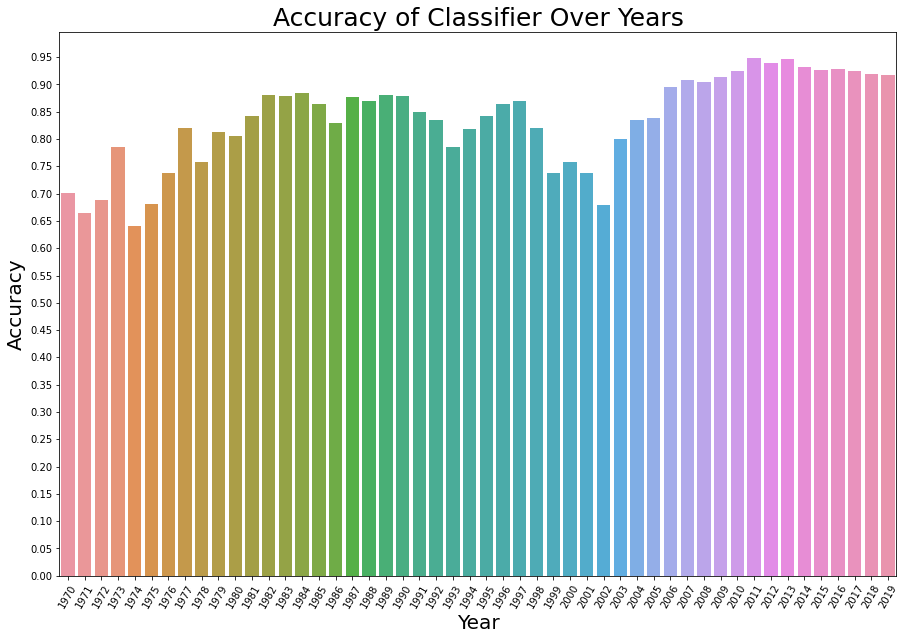

In [122]:
for i in range(0,len(years)):
    print('Accuracy for',years[i],'is',accuracy[i])
fig=plt.figure(figsize=(15,10))
ax=sns.barplot(x=years,y=accuracy)
ax.set_title('Accuracy of Classifier Over Years',fontsize=25)
ax.set_ylabel("Accuracy",fontsize=20)
ax.set_xlabel("Year",fontsize=20)
plt.yticks(np.arange(0,1,0.05))
plt.xticks(rotation=60)
plt.show

In [170]:
from statistics import mean
mean(accuracy)

0.8357703421263292

Overall accuracy of the most refined classifier is 0.835. Pretty decent but not amazing.

## Regression

I will now make a ML regressor that can predict the number of casualties and wounded from an attack. This will allow hospitals and medics to have a better guess on what kind or level of medical equipment and supplies are needed or even if medevac or other advanced resources are required. This is a multioutput regressor task as one output is the number of fatalities and the other output is the number of wounded. 

For the nkill variable, the codebook states "This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident. Where there is evidence of fatalities, but a figure is not reported or it is too vague to be of use, this field remains blank. If information is missing regarding the number of victims killed in an attack, but perpetrator fatalities are known, this value will reflect only the number of perpetrators who died as a result of the incident. Likewise, if information on the number of perpetrators killed in an attack is missing, but victim fatalities are known, this field will only report the number of victims killed in the incident."

Same thing applies for the nwound variable. Therefore, I will make new variables named "Wounded" and "Fatalities" to reflect only injured civilians and civilian fatalities by subtracting the wounded and killed perpetrators.

Each regressor will output the rmse for the two variables. Therefore, the lower the rmse, the better the predictions from the regressor.

### Data Prep for Regression

Going to use the raw data but filtered to exclude the nulls and for only the years 2017-2019. I want to keep the variables nwound, nkill, nkillter and nwoundter as they are critical to figuring out the number of civilian wounded and number of civilian fatalities

In [5]:
active_data=raw_data[raw_data["Year"]>=2017]
active_data=active_data.dropna(axis=0,subset=['latitude'])
active_data=active_data.dropna(axis=0,subset=['nwound'])
active_data=active_data.dropna(axis=0,subset=['nwoundte'])
active_data=active_data.dropna(axis=0,subset=['nkill'])
active_data=active_data.dropna(axis=0,subset=['nkillter'])
active_data=active_data.dropna(axis=1)
y=active_data[['nwound','nkill','nkillter','nwoundte']]
X=active_data.drop(columns=['Country','region_txt','provstate','city', 'attacktype1_txt','targtype1_txt',
                                      'summary','eventid','corp1','target1','weaptype1_txt','scite1','dbsource',
                                      'nwound','nkill','nkillter'])
y['Fatalities']=y['nkill']-y['nkillter']
y['Wounded']=y['nwound']-y['nwoundte']
y=y.drop(columns=["nkill",'nkillter','nwound','nwoundte'])
X=pd.get_dummies(X)

<ipython-input-5-a3c4396d3a77>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-a3c4396d3a77>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Random Forest Regressor

In [6]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
rfr=RandomForestRegressor(random_state=42, n_jobs=-1)
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

Wall time: 6.22 s


array([ 4.17001765, 12.41724932])

In [45]:
%%time
#coarse
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[10,100,150,200],
     'max_depth':[1,16,32],
     'min_samples_split':[2,10,20]
    }]
grid_search_rfr= GridSearchCV(rfr,param_grid,cv=3,n_jobs=-1)
grid_search_rfr.fit(X_train,y_train)
grid_search_rfr.best_params_

Wall time: 4min 23s


{'max_depth': 32, 'min_samples_split': 20, 'n_estimators': 100}

In [46]:
%%time
#more refined
param_grid=[
    {'n_estimators':[50,75,100,125],
     'max_depth':[24,32,48,64],
     'min_samples_split':[15,20,25,30]
    }]
grid_search_rfr= GridSearchCV(rfr,param_grid,cv=3,n_jobs=-1)
grid_search_rfr.fit(X_train,y_train)
grid_search_rfr.best_params_

Wall time: 8min 53s


{'max_depth': 48, 'min_samples_split': 30, 'n_estimators': 100}

In [47]:
%%time
#even more refined
param_grid=[
    {'n_estimators':[90,100,110],
     'max_depth':[40,48,54],
     'min_samples_split':[25,30,35,40,45]
    }]
grid_search_rfr= GridSearchCV(rfr,param_grid,cv=3,n_jobs=-1)
grid_search_rfr.fit(X_train,y_train)
grid_search_rfr.best_params_

Wall time: 7min 10s


{'max_depth': 40, 'min_samples_split': 45, 'n_estimators': 100}

In [93]:
final_rfr=RandomForestRegressor(random_state=42,n_jobs=-1,**grid_search_rfr.best_params_)
final_rfr.fit(X_train,y_train)
pred=final_rfr.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

array([ 3.86578071, 12.35280371])

### AdaBoostRegressor

In [117]:
%%time
from sklearn.ensemble import AdaBoostRegressor

Adar=AdaBoostRegressor(random_state=42)
wrapper_ada=MultiOutputRegressor(Adar)
wrapper_ada.fit(X_train,y_train)
pred=wrapper_ada.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

Wall time: 20.2 s


array([19.48454253, 13.30117716])

In [104]:
%%time
#coarse
param_grid=[
    {'estimator__n_estimators':[50,100,150,200],
     'estimator__learning_rate':[0.25,0.5,0.75,1,1.25]
    }]
grid_search_adar=GridSearchCV(wrapper_ada,param_grid,cv=3,n_jobs=-1)
grid_search_adar.fit(X_train,y_train)
grid_search_adar.best_params_

Wall time: 10min 40s


{'estimator__learning_rate': 0.25, 'estimator__n_estimators': 50}

In [89]:
%%time
#more refined
param_grid=[
    {'estimator__n_estimators':[25,50,75],
     'estimator__learning_rate':[0.1,0.2,0.25,0.3,0.4]
    }]
grid_search_adar=GridSearchCV(wrapper_ada,param_grid,cv=3,n_jobs=-1)
grid_search_adar.fit(X_train,y_train)
grid_search_adar.best_params_

Wall time: 5min 44s


{'estimator__learning_rate': 0.2, 'estimator__n_estimators': 25}

In [105]:
%%time
#even more refined
param_grid=[
    {'estimator__n_estimators':[15,20,25,30,35],
     'estimator__learning_rate':[0.1,0.15,0.2,0.25]
    }]
grid_search_adar=GridSearchCV(wrapper_ada,param_grid,cv=3,n_jobs=-1)
grid_search_adar.fit(X_train,y_train)
grid_search_adar.best_params_

Wall time: 4min 7s


{'estimator__learning_rate': 0.2, 'estimator__n_estimators': 15}

In [118]:
final_Adar=AdaBoostRegressor(random_state=42,learning_rate=0.2,n_estimators=15)
final_wrapper_ada=MultiOutputRegressor(final_Adar)
final_wrapper_ada.fit(X_train,y_train)
pred=final_wrapper_ada.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

array([ 6.07621688, 12.87054782])

### XGBRegressor

In [49]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost
XGBr=xgboost.XGBRegressor(random_state=42,n_jobs=-1)
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)
wrapper_xgb=MultiOutputRegressor(XGBr)
wrapper_xgb.fit(X_train_scale,y_train)
pred=wrapper_xgb.predict(X_test_scale)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

array([ 4.11134861, 12.89583459])

In [52]:
%%time
#coarse
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'estimator__n_estimators':[50,100,150],
     'estimator__max_depth':[1,5,10],
     'estimator__learning_rate':[0.05,0.1,0.3,0.6]
    }]
grid_search_xgbr=GridSearchCV(wrapper_xgb,param_grid,cv=3,n_jobs=-1)
grid_search_xgbr.fit(X_train_scale,y_train)
grid_search_xgbr.best_params_

Wall time: 10min 23s


{'estimator__learning_rate': 0.6,
 'estimator__max_depth': 1,
 'estimator__n_estimators': 100}

In [53]:
%%time
#more refined
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'estimator__n_estimators':[75,90,100,110,125],
     'estimator__max_depth':[1,2,3,4],
     'estimator__learning_rate':[0.5,0.6,0.7,0.75,0.8,0.9]
    }]
grid_search_xgbr=GridSearchCV(wrapper_xgb,param_grid,cv=3,n_jobs=-1)
grid_search_xgbr.fit(X_train_scale,y_train)
grid_search_xgbr.best_params_

Wall time: 18min 5s


{'estimator__learning_rate': 0.75,
 'estimator__max_depth': 1,
 'estimator__n_estimators': 100}

In [54]:
%%time
#even more refined
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'estimator__n_estimators':[95,100,105],
     'estimator__max_depth':[1,2],
     'estimator__learning_rate':[0.725,0.75,0.775]
    }]
grid_search_xgbr=GridSearchCV(wrapper_xgb,param_grid,cv=3,n_jobs=-1)
grid_search_xgbr.fit(X_train_scale,y_train)
grid_search_xgbr.best_params_

Wall time: 1min 54s


{'estimator__learning_rate': 0.75,
 'estimator__max_depth': 1,
 'estimator__n_estimators': 100}

In [55]:
final_XGBr=xgboost.XGBRegressor(random_state=42,n_jobs=-1,learning_rate=0.75,max_depth=1,n_estimators=100)
final_wrapper_xgb=MultiOutputRegressor(final_XGBr)
final_wrapper_xgb.fit(X_train_scale,y_train)
pred=final_wrapper_xgb.predict(X_test_scale)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

array([ 4.01766542, 12.49716509])

### Artificial Neural Network

In [66]:
X.shape

(25426, 536)

In [56]:
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import normalize
tf.random.set_seed(42)

X_train_ann=normalize(X_train)
X_test_ann=normalize(X_test)
model=keras.models.Sequential([
    keras.layers.Dense(536,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(2)
])
model.compile(loss="mean_squared_error",optimizer='sgd',metrics=[keras.metrics.RootMeanSquaredError()])
model.fit(X_train_ann,y_train,epochs=200)
pred_ann=model.predict(X_test_ann)
mean_squared_error(y_test,pred_ann,multioutput='raw_values',squared=False)

Epoch 1/200
596/596 [==============================] - 2s 2ms/step - loss: 73.0057 - root_mean_squared_error: 8.5443
Epoch 2/200
596/596 [==============================] - 1s 2ms/step - loss: 72.9050 - root_mean_squared_error: 8.5384: 0s - loss: 84.8917 - root_mean_squ
Epoch 3/200
596/596 [==============================] - 1s 2ms/step - loss: 72.9119 - root_mean_squared_error: 8.5388
Epoch 4/200
596/596 [==============================] - 1s 2ms/step - loss: 72.9068 - root_mean_squared_error: 8.5385
Epoch 5/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8907 - root_mean_squared_error: 8.5376
Epoch 6/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8813 - root_mean_squared_error: 8.5371
Epoch 7/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8862 - root_mean_squared_error: 8.5373
Epoch 8/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8744 - root_mean_squared_error: 8.5367
Epoch 9/200
596/596 [=======

596/596 [==============================] - 1s 2ms/step - loss: 72.8591 - root_mean_squared_error: 8.5358
Epoch 135/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8660 - root_mean_squared_error: 8.5362
Epoch 136/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8609 - root_mean_squared_error: 8.5359
Epoch 137/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8649 - root_mean_squared_error: 8.5361
Epoch 138/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8563 - root_mean_squared_error: 8.5356
Epoch 139/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8644 - root_mean_squared_error: 8.5361
Epoch 140/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8662 - root_mean_squared_error: 8.5362
Epoch 141/200
596/596 [==============================] - 1s 2ms/step - loss: 72.8633 - root_mean_squared_error: 8.5360
Epoch 142/200
596/596 [==============================] - 1s 2m

array([ 4.3780551 , 12.83732654])

In [57]:
def build_model2(n_neurons=20,n_hidden=2,learning_rate=0.001):
    dummy=keras.models.Sequential()
    dummy.add(keras.layers.InputLayer(input_shape=536))
    for layer in range(1,n_hidden+1):
        dummy.add(keras.layers.Dense(n_neurons,activation="relu"))
    dummy.add(keras.layers.Dense(2))
    dummy.compile(loss="mean_squared_error",optimizer='sgd')
    return dummy

In [58]:
from scikeras.wrappers import KerasClassifier
test_model2=KerasClassifier(build_model2,loss="mean_squared_error",
                           n_hidden=3,n_neurons=50,learning_rate=0.0001)

In [59]:
%%time
#coarse
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_hidden':[3,4,5,6],
     'n_neurons':[50,100,150],
     'learning_rate':[0.0001,0.001,0.01]
    }]
grid_search_ann=GridSearchCV(test_model2,param_grid,cv=3,n_jobs=-1)
grid_search_ann.fit(X_train_ann,y_train,epochs=50)
grid_search_ann.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



Epoch 1/50
596/596 [==============================] - 1s 716us/step - loss: 73.0085
Epoch 2/50
596/596 [==============================] - 0s 714us/step - loss: 72.9024
Epoch 3/50
596/596 [==============================] - 0s 717us/step - loss: 72.9098
Epoch 4/50
596/596 [==============================] - 0s 712us/step - loss: 72.9065
Epoch 5/50
596/596 [==============================] - 0s 712us/step - loss: 72.8902
Epoch 6/50
596/596 [==============================] - 0s 714us/step - loss: 72.8821
Epoch 7/50
596/596 [==============================] - 0s 719us/step - loss: 72.8867
Epoch 8/50
596/596 [==============================] - 0s 719us/step - loss: 72.8750
Epoch 9/50
596/596 [==============================] - 0s 717us/step - loss: 72.8787
Epoch 10/50
596/596 [==============================] - 0s 736us/step - loss: 72.8794
Epoch 11/50
596/596 [==============================] - 0s 716us/step - loss: 72.8757
Epoch 12/50
596/596 [==============================] - 0s 711us/step - los

{'learning_rate': 0.0001, 'n_hidden': 3, 'n_neurons': 50}

In [62]:
%%time
#more refined
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_hidden':[1,2,3,4],
     'n_neurons':[25,50,75],
     'learning_rate':[0.00001,0.00005,0.000075,0.0001,0.0005]
    }]
grid_search_ann=GridSearchCV(test_model2,param_grid,cv=3,n_jobs=-1)
grid_search_ann.fit(X_train_ann,y_train,epochs=50)
grid_search_ann.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]



Epoch 1/50
596/596 [==============================] - 1s 603us/step - loss: 73.0202
Epoch 2/50
596/596 [==============================] - 0s 612us/step - loss: 72.8955
Epoch 3/50
596/596 [==============================] - 0s 603us/step - loss: 72.9074
Epoch 4/50
596/596 [==============================] - 0s 627us/step - loss: 72.9037
Epoch 5/50
596/596 [==============================] - 0s 588us/step - loss: 72.8851
Epoch 6/50
596/596 [==============================] - 0s 588us/step - loss: 72.8737
Epoch 7/50
596/596 [==============================] - 0s 582us/step - loss: 72.8777
Epoch 8/50
596/596 [==============================] - 0s 587us/step - loss: 72.8638
Epoch 9/50
596/596 [==============================] - 0s 585us/step - loss: 72.8628
Epoch 10/50
596/596 [==============================] - 0s 588us/step - loss: 72.8639
Epoch 11/50
596/596 [==============================] - 0s 592us/step - loss: 72.8570
Epoch 12/50
596/596 [==============================] - 0s 605us/step - los

{'learning_rate': 1e-05, 'n_hidden': 1, 'n_neurons': 25}

In [63]:
%%time
#even more refined
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_hidden':[1,2],
     'n_neurons':[10,20,25,30,50],
     'learning_rate':[0.000005,0.0000075,0.00001,0.00002]
    }]
grid_search_ann=GridSearchCV(test_model2,param_grid,cv=3,n_jobs=-1)
grid_search_ann.fit(X_train_ann,y_train,epochs=50)
grid_search_ann.best_params_

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]



Epoch 1/50
596/596 [==============================] - 0s 575us/step - loss: 73.0285
Epoch 2/50
596/596 [==============================] - 0s 560us/step - loss: 72.8957
Epoch 3/50
596/596 [==============================] - 0s 555us/step - loss: 72.9062
Epoch 4/50
596/596 [==============================] - 0s 572us/step - loss: 72.9035
Epoch 5/50
596/596 [==============================] - 0s 568us/step - loss: 72.8843
Epoch 6/50
596/596 [==============================] - 0s 563us/step - loss: 72.87330s - loss: 
Epoch 7/50
596/596 [==============================] - 0s 562us/step - loss: 72.8769
Epoch 8/50
596/596 [==============================] - 0s 563us/step - loss: 72.8625
Epoch 9/50
596/596 [==============================] - 0s 562us/step - loss: 72.8621
Epoch 10/50
596/596 [==============================] - 0s 567us/step - loss: 72.8647
Epoch 11/50
596/596 [==============================] - 0s 567us/step - loss: 72.8564
Epoch 12/50
596/596 [==============================] - 0s 563us

{'learning_rate': 5e-06, 'n_hidden': 1, 'n_neurons': 10}

In [64]:
final_ann_reg_model=keras.models.Sequential([
    keras.layers.Dense(536,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(2)
])
final_ann_reg_model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.000005),metrics=[keras.metrics.RootMeanSquaredError()])
final_ann_reg_model.fit(X_train_ann,y_train,epochs=200)

Epoch 1/200
596/596 [==============================] - 1s 2ms/step - loss: 76.1173 - root_mean_squared_error: 8.7245
Epoch 2/200
596/596 [==============================] - 1s 1ms/step - loss: 76.0553 - root_mean_squared_error: 8.7210
Epoch 3/200
596/596 [==============================] - 1s 1ms/step - loss: 76.0130 - root_mean_squared_error: 8.7185
Epoch 4/200
596/596 [==============================] - 1s 2ms/step - loss: 75.9746 - root_mean_squared_error: 8.7163
Epoch 5/200
596/596 [==============================] - 1s 1ms/step - loss: 75.9366 - root_mean_squared_error: 8.7142
Epoch 6/200
596/596 [==============================] - 1s 1ms/step - loss: 75.8990 - root_mean_squared_error: 8.7120
Epoch 7/200
596/596 [==============================] - 1s 1ms/step - loss: 75.8619 - root_mean_squared_error: 8.7099
Epoch 8/200
596/596 [==============================] - 1s 1ms/step - loss: 75.8249 - root_mean_squared_error: 8.7078
Epoch 9/200
596/596 [==============================] - 1s 2ms/st

596/596 [==============================] - 1s 1ms/step - loss: 72.9558 - root_mean_squared_error: 8.5414
Epoch 133/200
596/596 [==============================] - 1s 1ms/step - loss: 72.9507 - root_mean_squared_error: 8.5411
Epoch 134/200
596/596 [==============================] - 1s 2ms/step - loss: 72.9459 - root_mean_squared_error: 8.5408
Epoch 135/200
596/596 [==============================] - 1s 2ms/step - loss: 72.9413 - root_mean_squared_error: 8.5406
Epoch 136/200
596/596 [==============================] - 1s 1ms/step - loss: 72.9369 - root_mean_squared_error: 8.5403: 0s - loss: 53.1873 - root_mean
Epoch 137/200
596/596 [==============================] - 1s 1ms/step - loss: 72.9327 - root_mean_squared_error: 8.5401
Epoch 138/200
596/596 [==============================] - 1s 1ms/step - loss: 72.9287 - root_mean_squared_error: 8.5398
Epoch 139/200
596/596 [==============================] - 1s 2ms/step - loss: 72.9248 - root_mean_squared_error: 8.5396
Epoch 140/200
596/596 [=======

In [65]:
pred_ann=final_ann_reg_model.predict(X_test_ann)
mean_squared_error(y_test,pred_ann,multioutput='raw_values',squared=False)

array([ 4.37789473, 12.83801529])

The optimized Random Forest Regressor beats out the other ones. 

In [7]:
#I set my final regressor as the hypertuned Random Forest Regressor as it was the one with the best performance
regressor=RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=40,min_samples_split=45,n_estimators=100)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

array([ 3.86578071, 12.35280371])

Let's see how well this generalizes. I will use a different subset of years to train and test this regressor.

In [8]:

active_data=raw_data[(raw_data["Year"]==2014)|(raw_data["Year"]==2015)|(raw_data["Year"]==2016)]
active_data=active_data.dropna(axis=0,subset=['latitude'])
active_data=active_data.dropna(axis=0,subset=['nwound'])
active_data=active_data.dropna(axis=0,subset=['nwoundte'])
active_data=active_data.dropna(axis=0,subset=['nkill'])
active_data=active_data.dropna(axis=0,subset=['nkillter'])
active_data=active_data.dropna(axis=1)
y=active_data[['nwound','nkill','nkillter','nwoundte']]
X=active_data.drop(columns=['Country','region_txt','provstate','city', 'attacktype1_txt','targtype1_txt',
                                      'summary','eventid','corp1','target1','weaptype1_txt','scite1','dbsource',
                                      'nwound','nkill','nkillter'])
y['Fatalities']=y['nkill']-y['nkillter']
y['Wounded']=y['nwound']-y['nwoundte']
y=y.drop(columns=["nkill",'nkillter','nwound','nwoundte'])
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
mean_squared_error(y_test,pred,multioutput='raw_values',squared=False)

<ipython-input-8-c91fbd63bf4d>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-c91fbd63bf4d>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([ 7.79484627, 16.39112054])

The rmse for fatalities is nearly 100% more and the rmse for wounded is up by 25%. Considering the rmse is just an average error of about 8 fatalities, and 16 wounded, its not too horrible. I will apply this regressor to every year and graph the rmse.

In [9]:
years=[i for i in range(1970,2020)]
rmse=[]
for i in range(1970,2020):
    active_data=raw_data[raw_data["Year"]==i]
    active_data=active_data.dropna(axis=0,subset=['nwound'])
    active_data=active_data.dropna(axis=0,subset=['nwoundte'])
    active_data=active_data.dropna(axis=0,subset=['nkill'])
    active_data=active_data.dropna(axis=0,subset=['nkillter'])
    if(i!=1993):
        active_data=active_data.dropna(axis=0,subset=['latitude'])
    active_data=active_data.drop(columns=['Country','region_txt','provstate','city', 
                                          'attacktype1_txt','targtype1_txt','summary',
                                          'natlty1_txt','eventid','corp1','target1','weaptype1_txt',
                                          'addnotes','scite1','scite2','scite3','dbsource'])
    active_data=active_data.dropna(axis=1)
    y=active_data[['nwound','nkill','nkillter','nwoundte']]
    active_data=active_data.drop(columns=["nkill",'nkillter','nwound','nwoundte'])
    y['Fatalities']=y['nkill']-y['nkillter']
    y['Wounded']=y['nwound']-y['nwoundte']
    y=y.drop(columns=["nkill",'nkillter','nwound','nwoundte'])
    X=active_data
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
    regressor=RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=40,min_samples_split=45,n_estimators=100)
    regressor.fit(X_train,y_train)
    pred=regressor.predict(X_test)
    rmse.append(mean_squared_error(y_test,pred,multioutput='raw_values',squared=False))



RMSE for 1970 is [0.22641222 1.77226425]
RMSE for 1971 is [0.11245117 0.01826736]
RMSE for 1972 is [0.70194025 3.9102467 ]
RMSE for 1973 is [0.5656393  0.66603644]
RMSE for 1974 is [0.55789474 4.01289474]
RMSE for 1975 is [0.7756991  1.76177778]
RMSE for 1976 is [0.42290323 0.96903226]
RMSE for 1977 is [10.57198696  9.4592759 ]
RMSE for 1978 is [0.56836976 1.24765558]
RMSE for 1979 is [1.43756915 2.86627598]
RMSE for 1980 is [4.53682306 6.43080145]
RMSE for 1981 is [1.51632463 1.93155237]
RMSE for 1982 is [11.87955206  2.26498638]
RMSE for 1983 is [5.89562953 9.46760735]
RMSE for 1984 is [  1.18621367 140.16473103]
RMSE for 1985 is [1.62463882 7.85054575]
RMSE for 1986 is [3.66495245 8.54349743]
RMSE for 1987 is [2.41613867 6.98262442]
RMSE for 1988 is [1.16123102 8.35825756]
RMSE for 1989 is [2.90563732 4.48811487]
RMSE for 1990 is [1.34625561 1.20109164]
RMSE for 1991 is [7.14817788 2.81968868]
RMSE for 1992 is [2.48541523 6.79727325]
RMSE for 1993 is [ 5.54346395 18.22529599]
RMSE f

<function matplotlib.pyplot.show(close=None, block=None)>

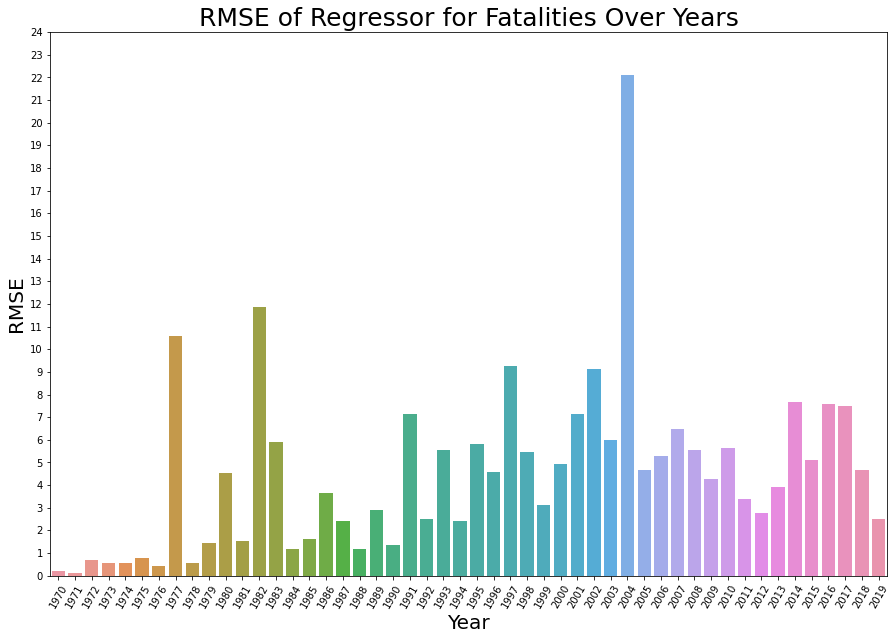

In [13]:
for i in range(0,len(years)):
    print('RMSE for',years[i],'is',rmse[i])
fig=plt.figure(figsize=(15,10))
rmse_df=pd.DataFrame(rmse)
ax=sns.barplot(x=years,y=rmse_df[0])
ax.set_title('RMSE of Regressor for Fatalities Over Years',fontsize=25)
ax.set_ylabel("RMSE",fontsize=20)
ax.set_xlabel("Year",fontsize=20)
plt.yticks(np.arange(0,25,1))
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

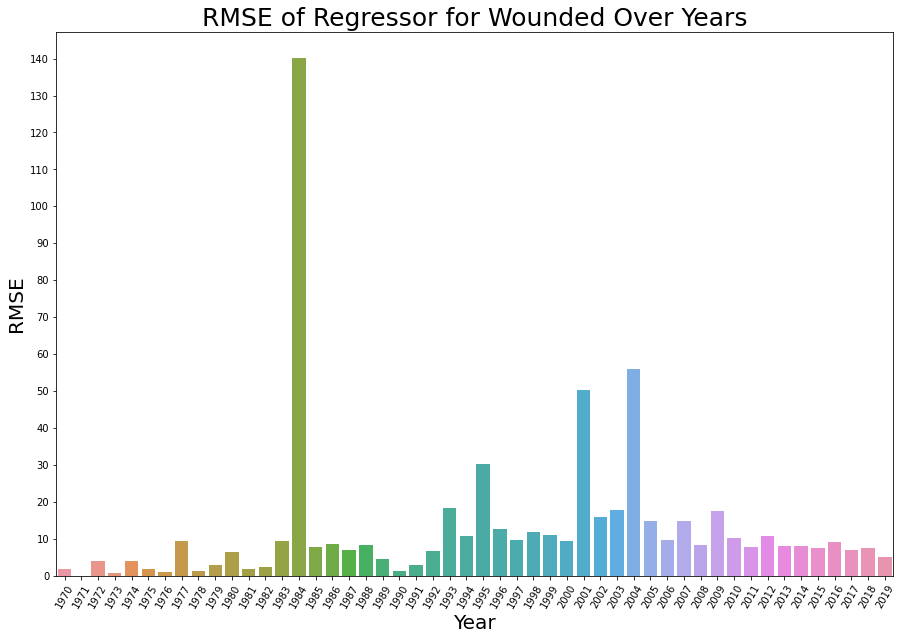

In [214]:
fig=plt.figure(figsize=(15,10))
ax=sns.barplot(x=years,y=rmse_df[1])
ax.set_title('RMSE of Regressor for Wounded Over Years',fontsize=25)
ax.set_ylabel("RMSE",fontsize=20)
ax.set_xlabel("Year",fontsize=20)
plt.yticks(np.arange(0,150,10))
plt.xticks(rotation=60)
plt.show

In [15]:
from statistics import mean
print(mean(rmse_df[0]))
print(mean(rmse_df[1]))

4.524080597277631
12.676830561016843


What would happen to the average rmse for fatalities and wounded if I removed the outliers? For fatalities, 1977, 1982 and 2004 are the outliers while for wounded, it is 1984, 2001 and 2004. 

In [28]:
rmse_fatal_no_outliers=rmse_df[rmse_df[0]<10]
mean(rmse_fatal_no_outliers[0])

3.8650575551442246

In [29]:
rmse_wound_no_outliers=rmse_df[rmse_df[1]<40]
mean(rmse_wound_no_outliers[1])

8.239270457572909

Not too much of an effect on the fatalities but a drastic effect on the number of wounded. A average rmse of 3.86 fatalities and 8.23 wounded is pretty solid. 